In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Crickets.csv',encoding = 'latin')
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15


In [60]:
df.shape

(79, 13)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [62]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [63]:
df['HS'] = df.HS.str.extract('(\d+)')
df['HS'] = df['HS'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     int64  
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 8.1+ KB


In [64]:
df[['start','end']] = df.Span.str.split("-",expand=True)
df[['start','end']] = df[['start','end']].astype(int)
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133,45.03,7908,64.92,11,31,3,1975,1991
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96,43.40,6945,73.75,0,42,6,2002,2015
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120,35.36,6614,76.98,5,26,7,2001,2011
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009


In [65]:
df['Span'] = df['end'] - df['start']
df = df.drop(columns=['start','end'])
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),23,463,452,41,18426,200,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),15,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),17,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),22,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),17,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),16,128,127,13,5134,133,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),13,162,149,31,5122,96,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),10,197,181,37,5092,120,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),11,198,161,33,5088,156,39.75,5504,92.44,6,30,15


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     int64  
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     int64  
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.1+ KB


In [67]:
df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [68]:
df[df.duplicated()]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0


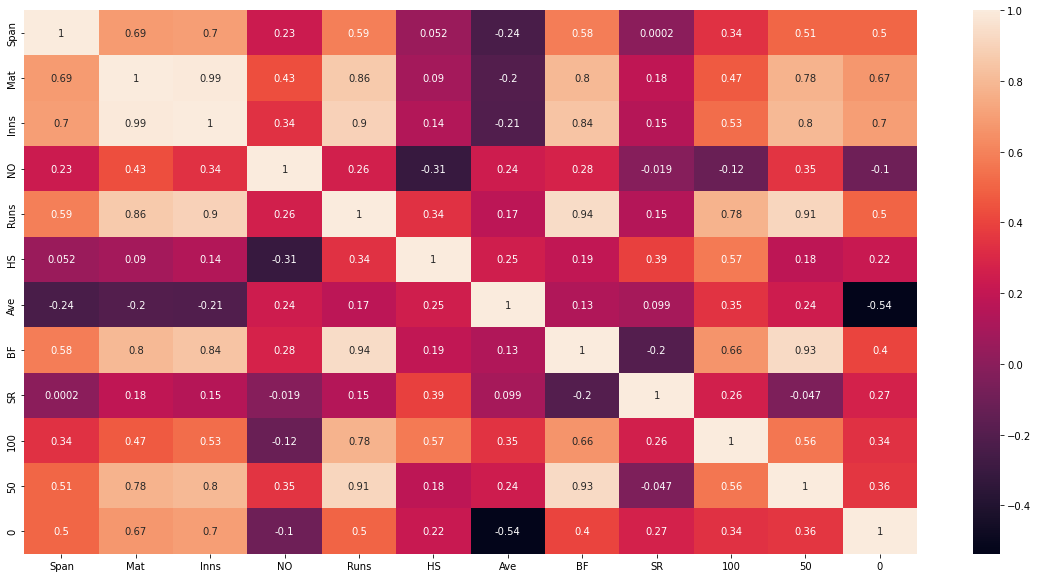

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot =True)
plt.show()

In [70]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),23,463,452,41,18426,200,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),15,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),17,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),22,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),17,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),16,128,127,13,5134,133,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),13,162,149,31,5122,96,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),10,197,181,37,5092,120,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),11,198,161,33,5088,156,39.75,5504,92.44,6,30,15


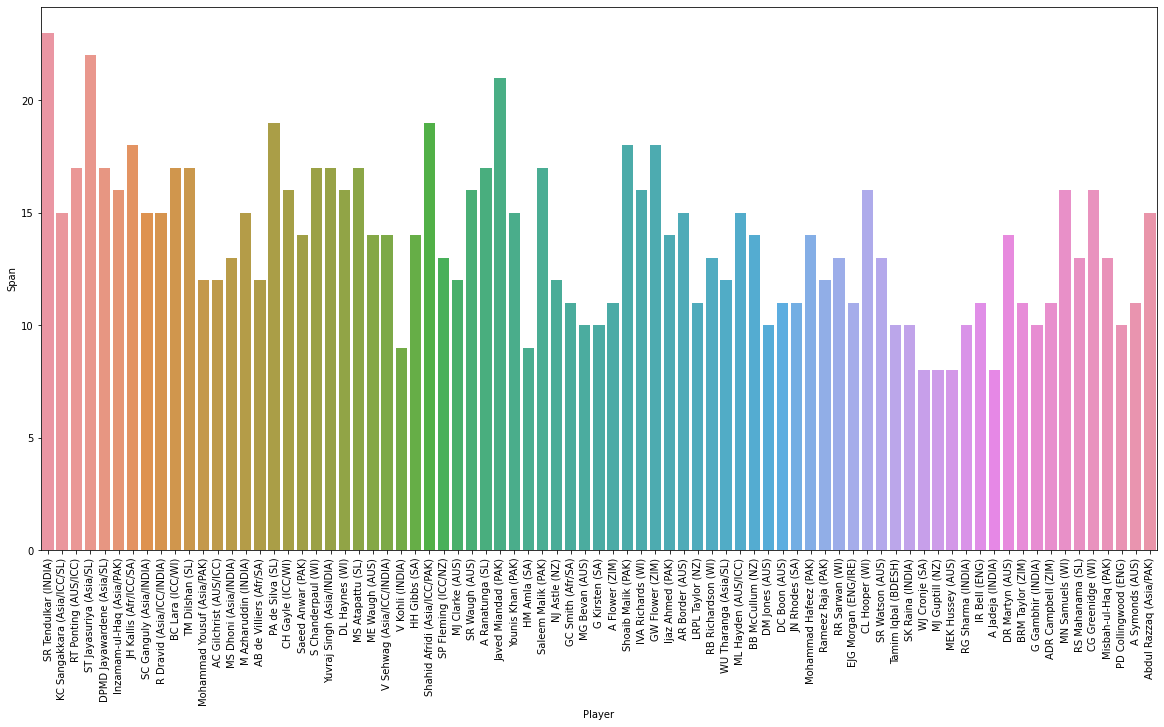

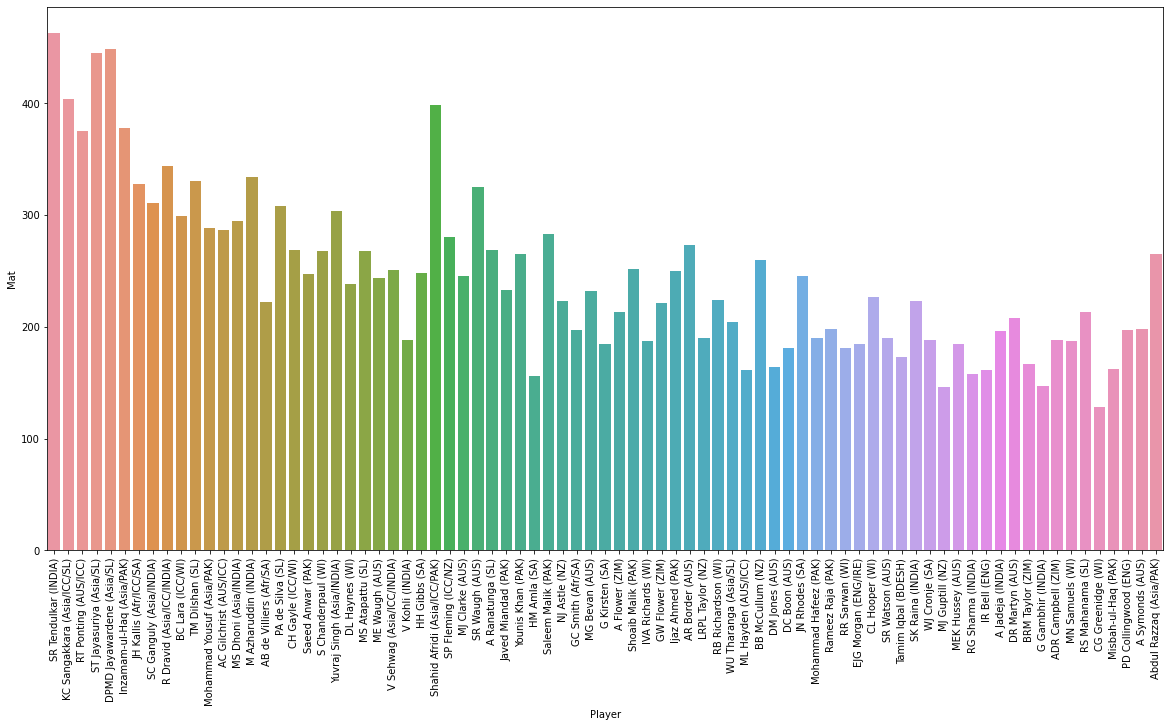

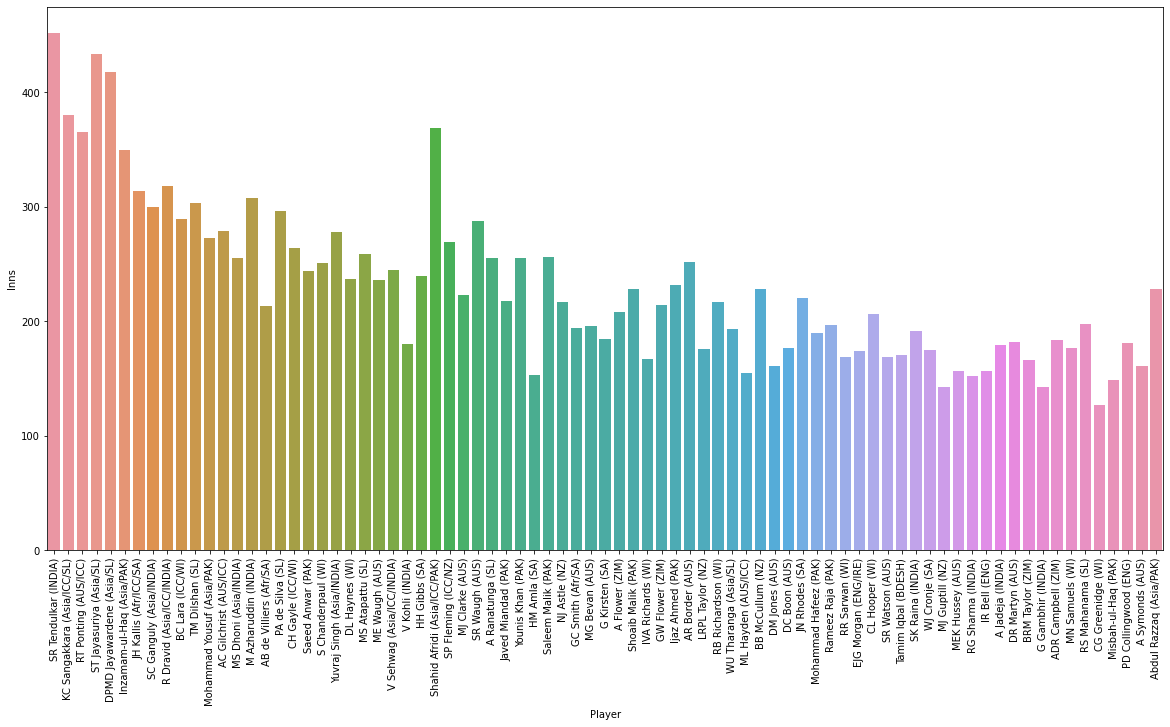

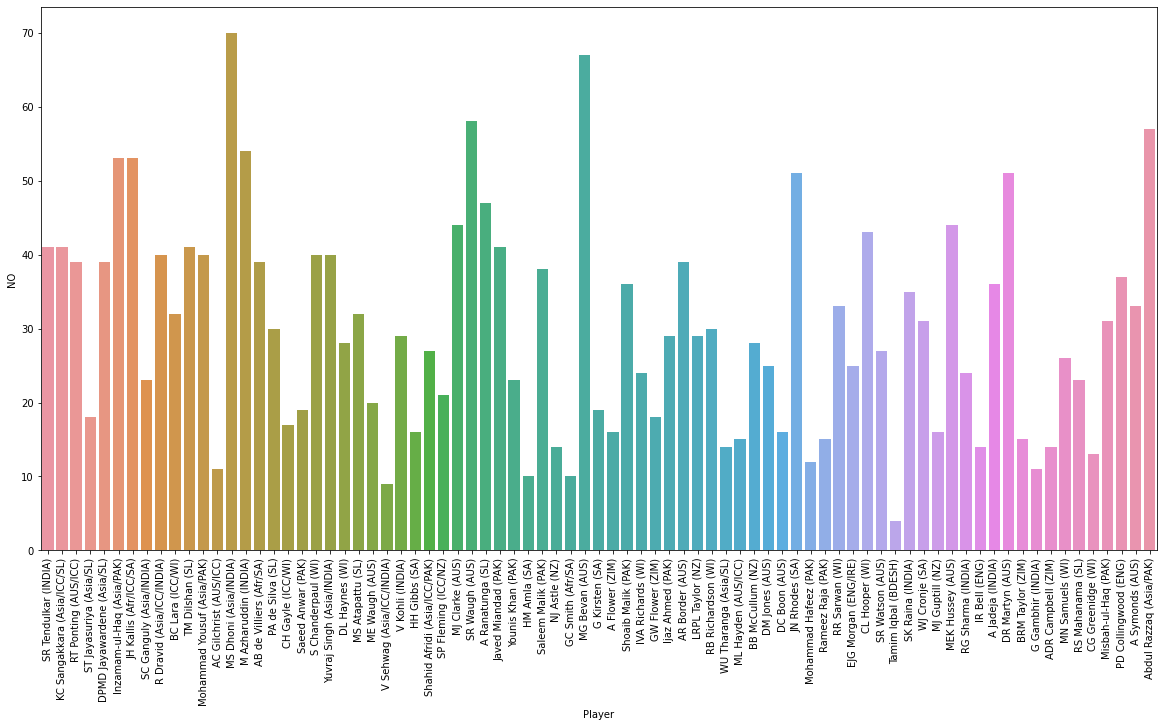

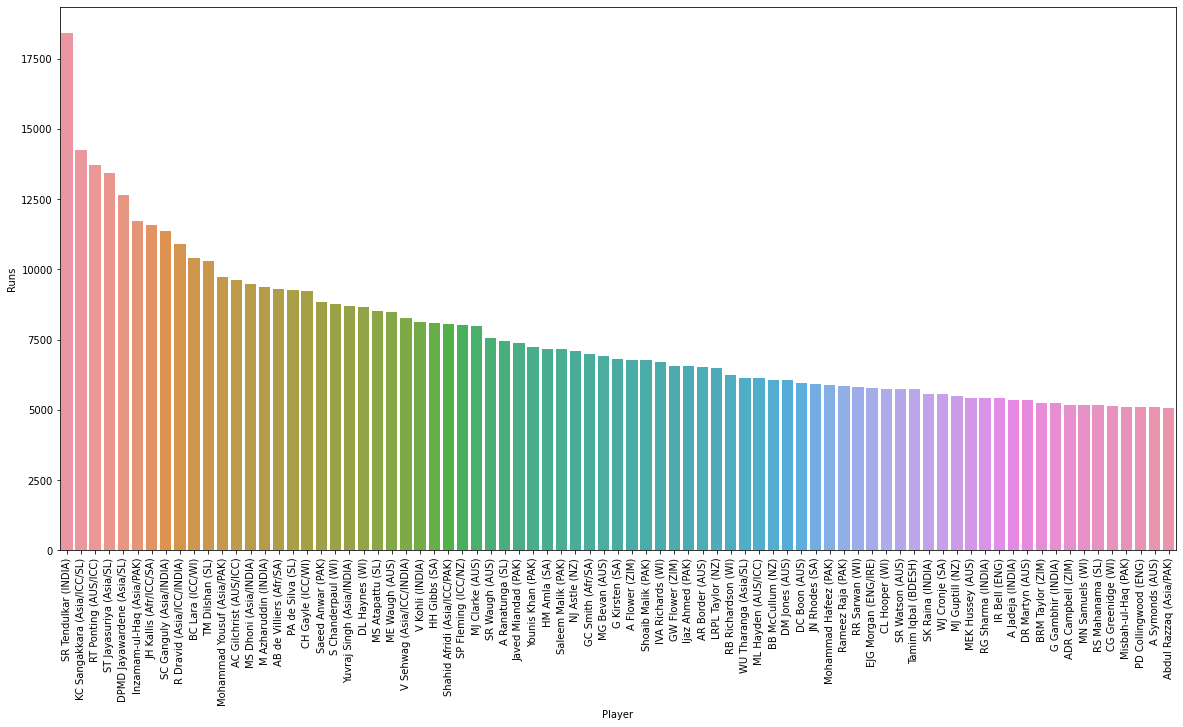

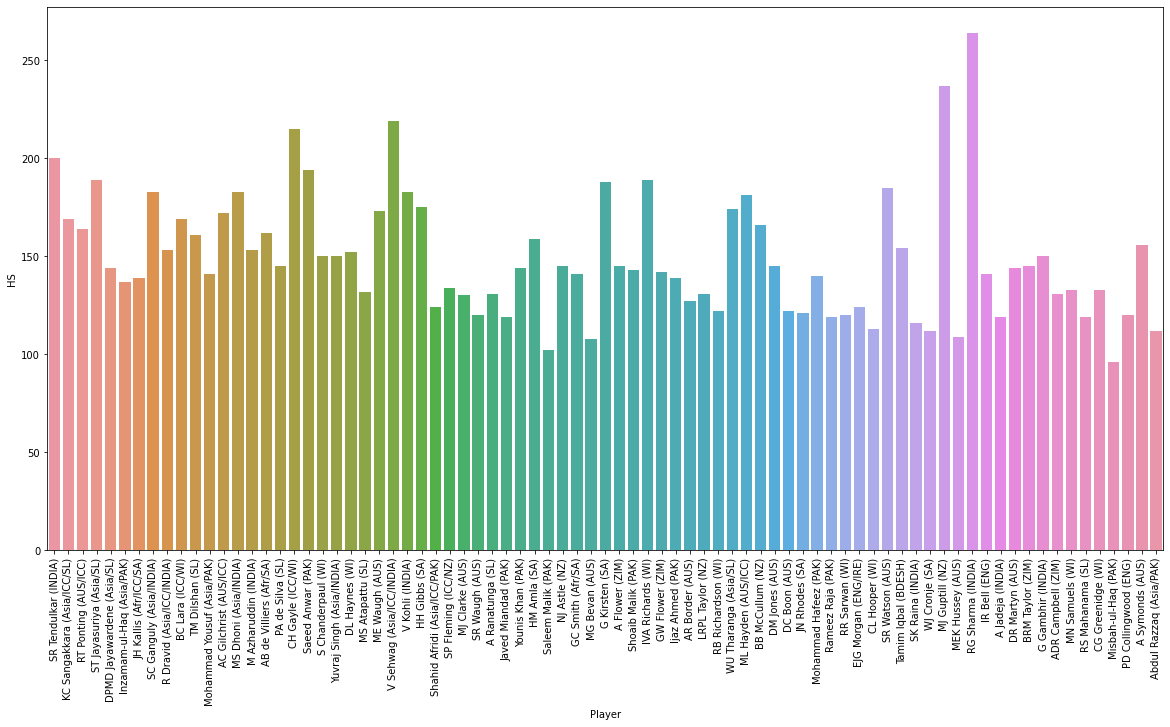

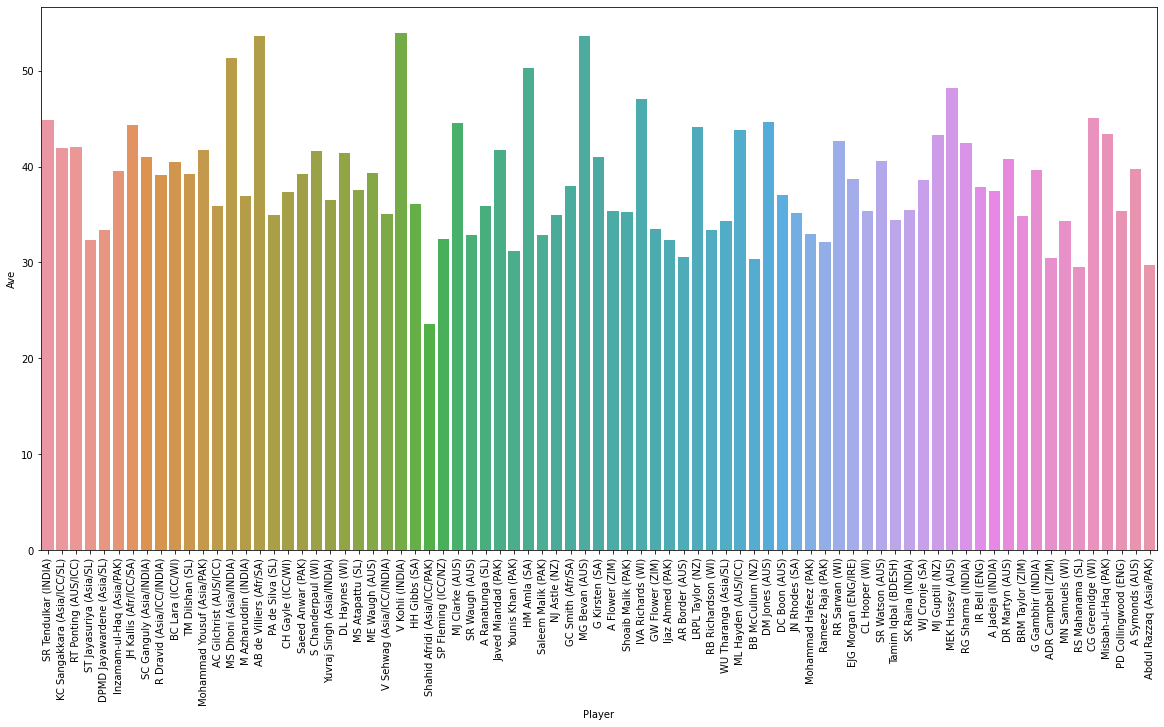

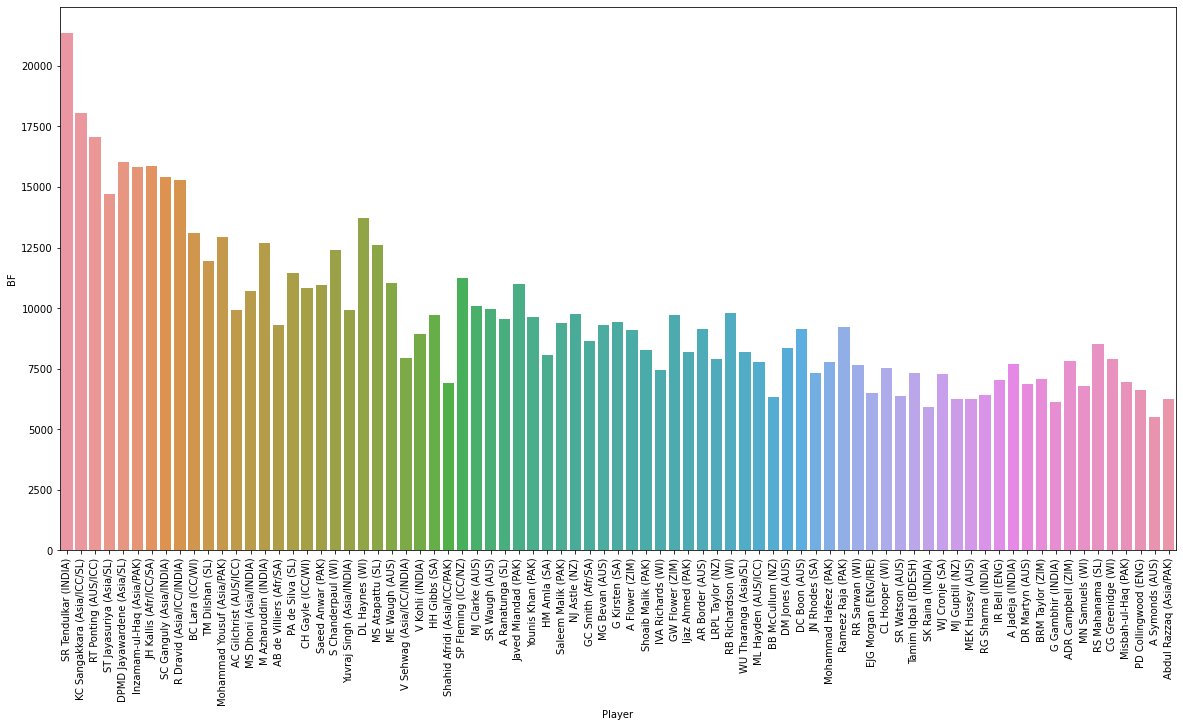

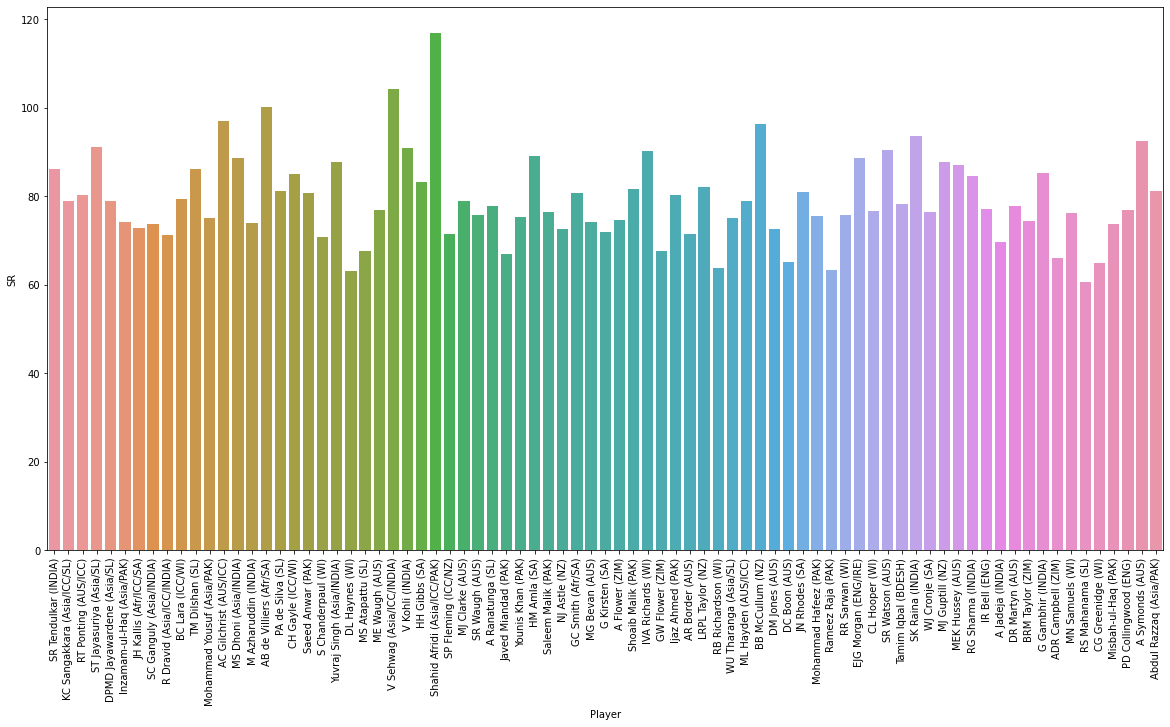

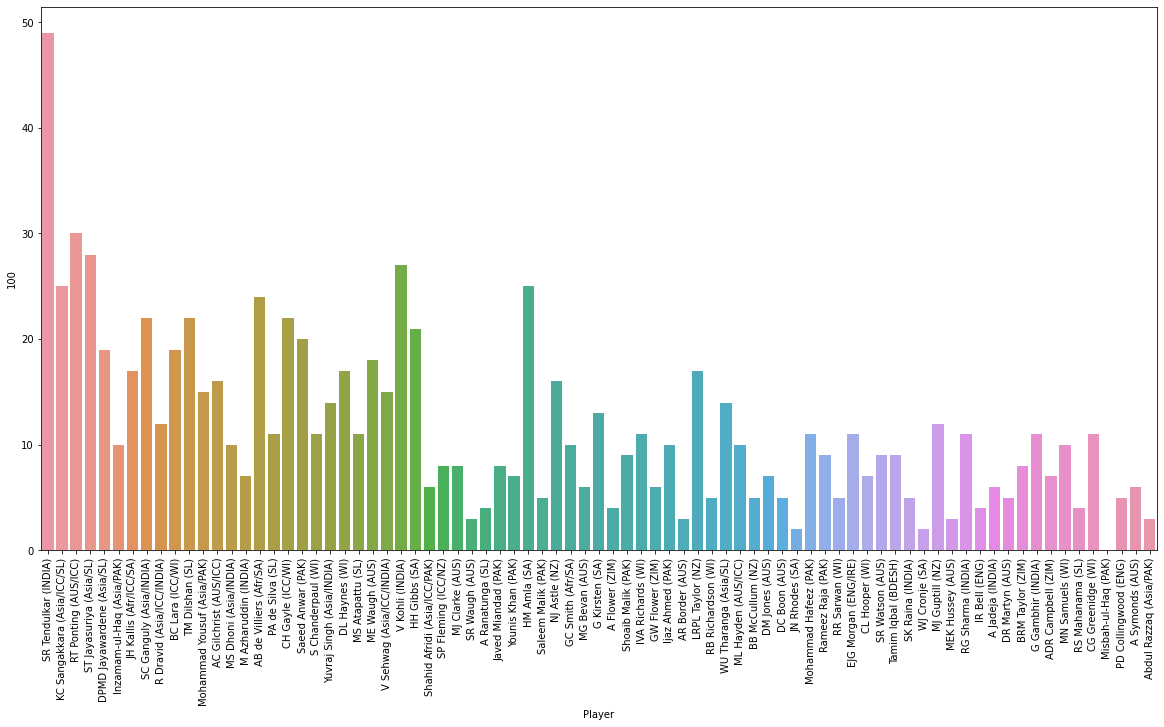

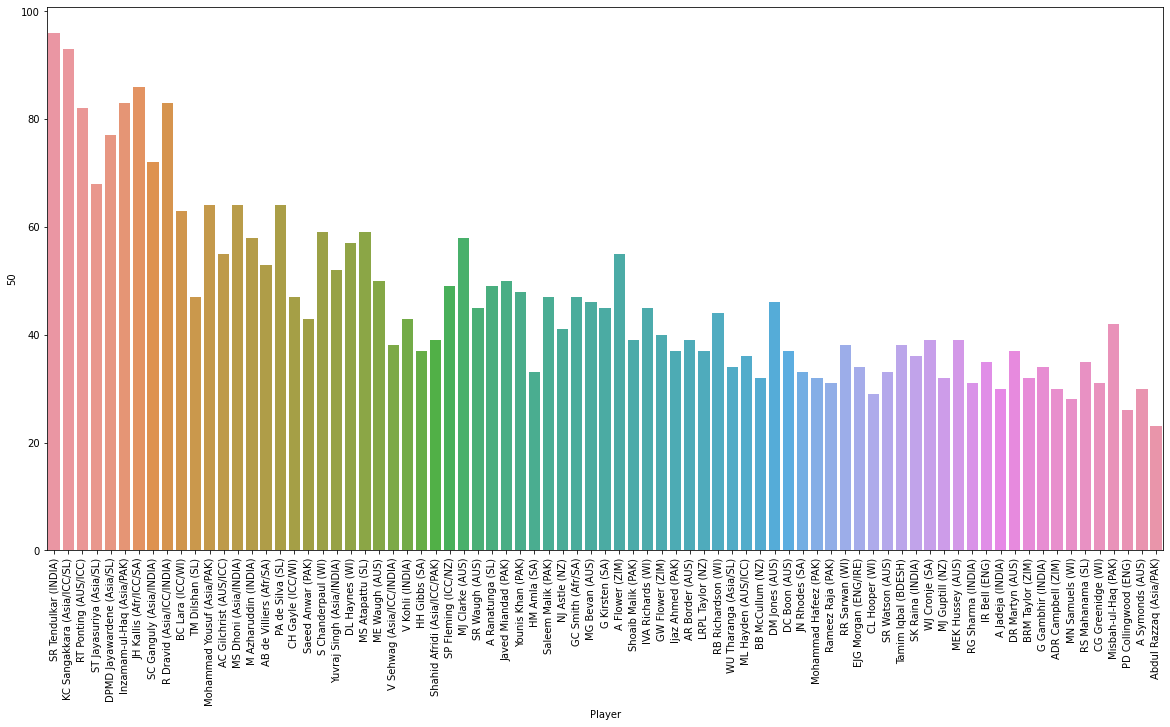

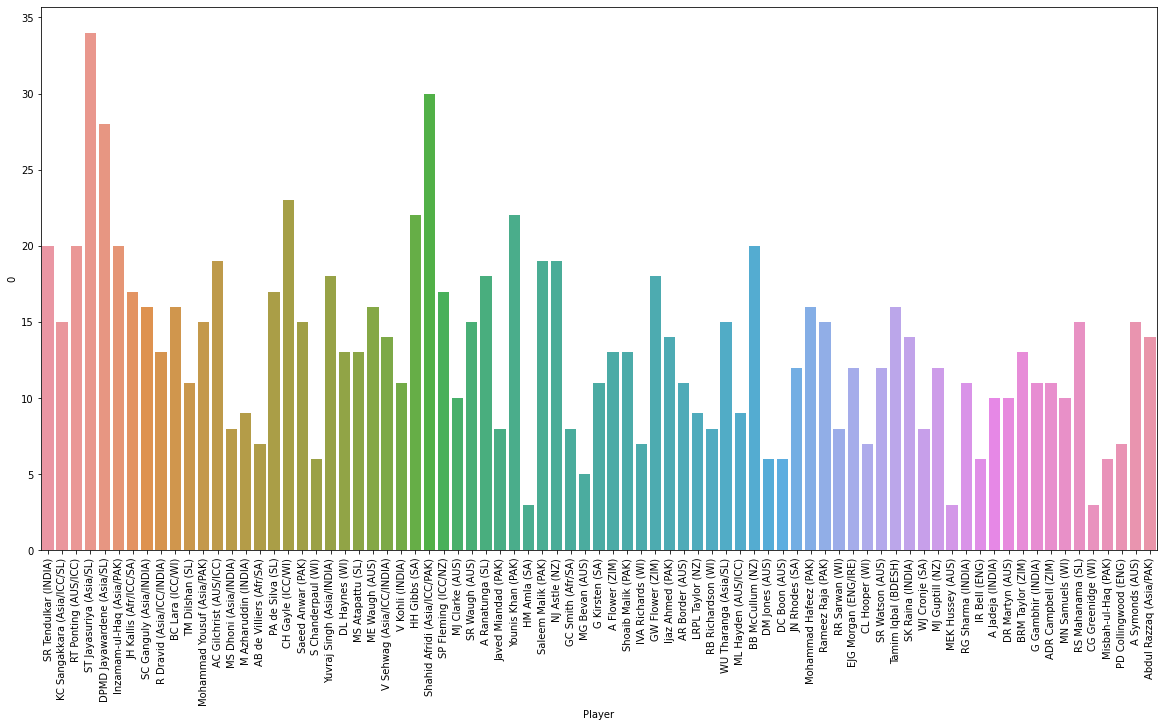

In [71]:
cols = ['Span','Mat','Inns','NO','Runs','HS','Ave','BF','SR','100','50','0']
for col in cols:
  plt.figure(figsize=(20,10))
  sns.barplot(x='Player',y=col,data=df)
  plt.xticks(rotation=90)
  plt.ylabel(col)
  plt.show()

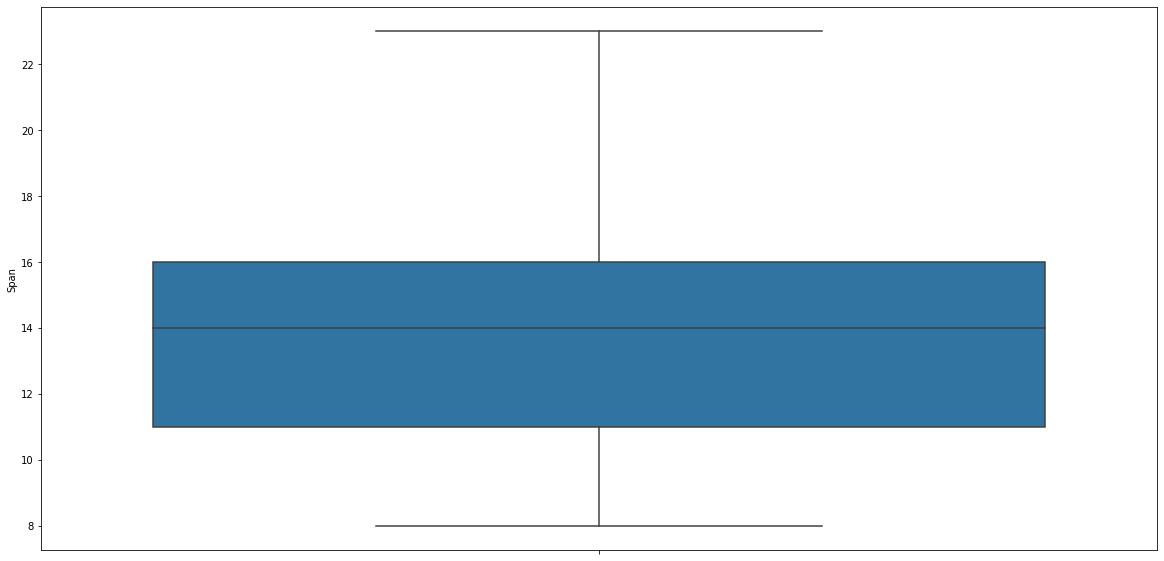

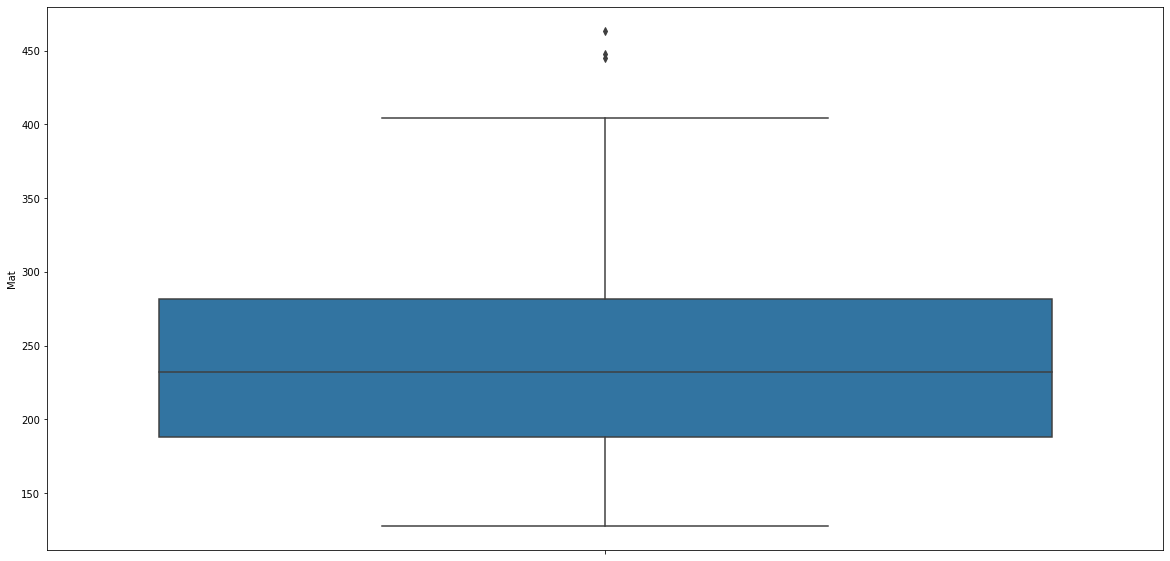

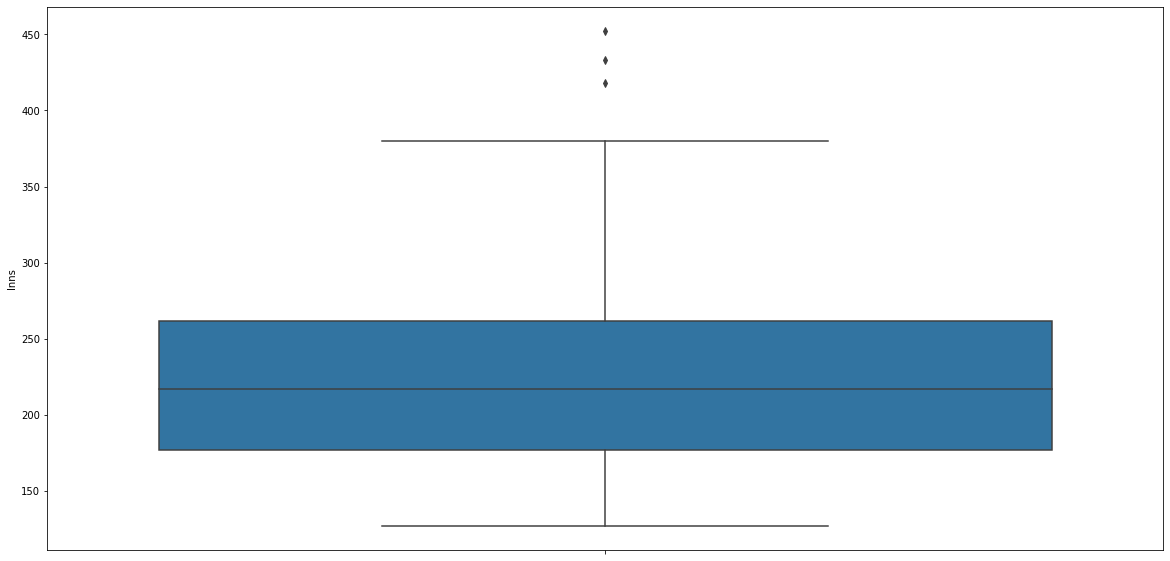

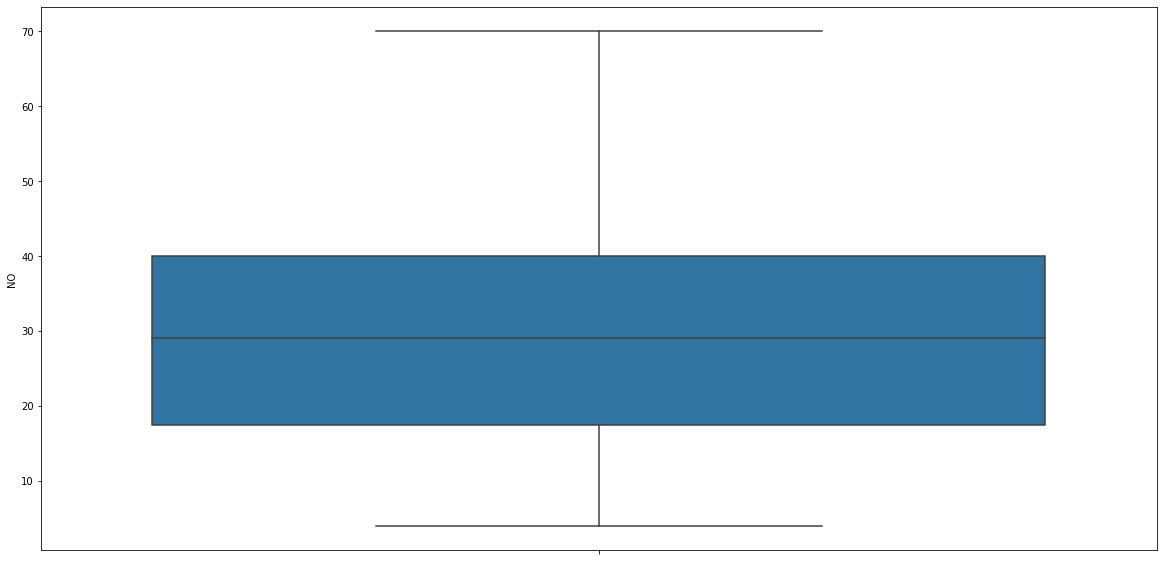

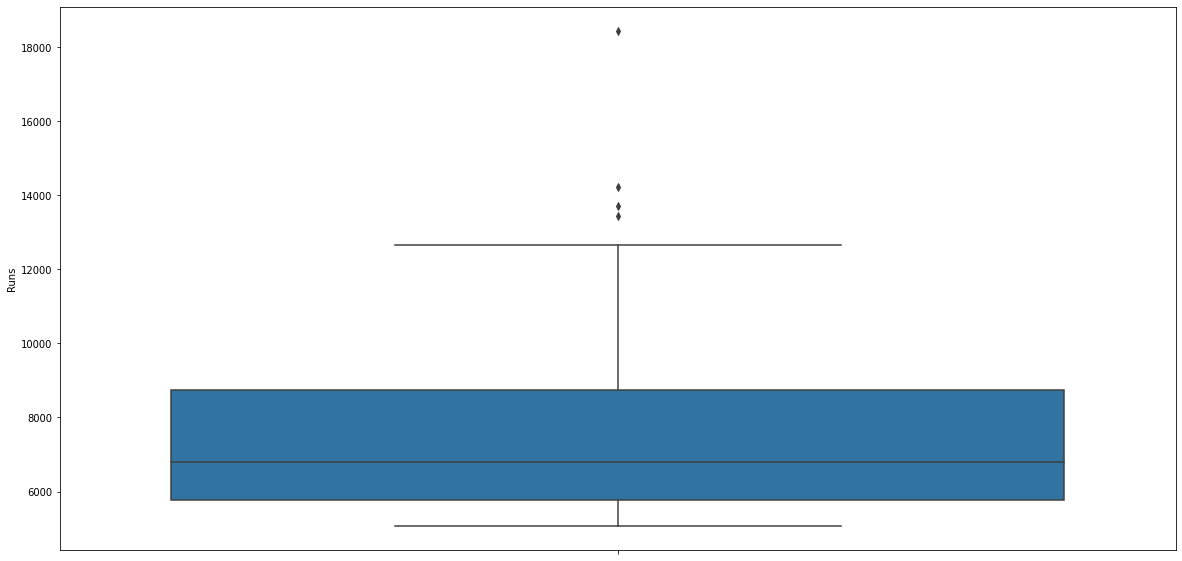

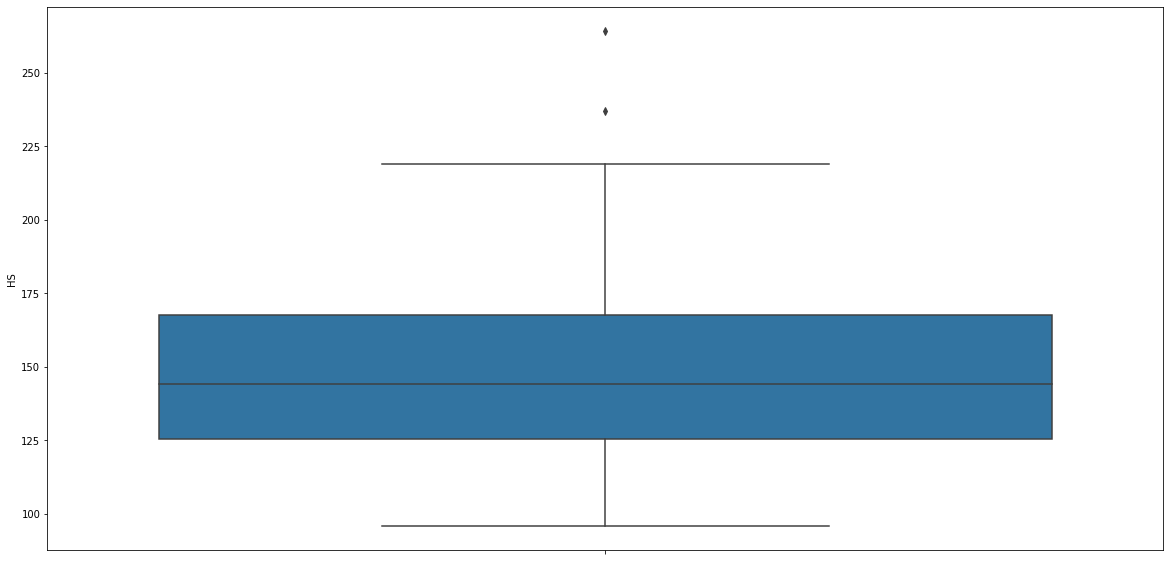

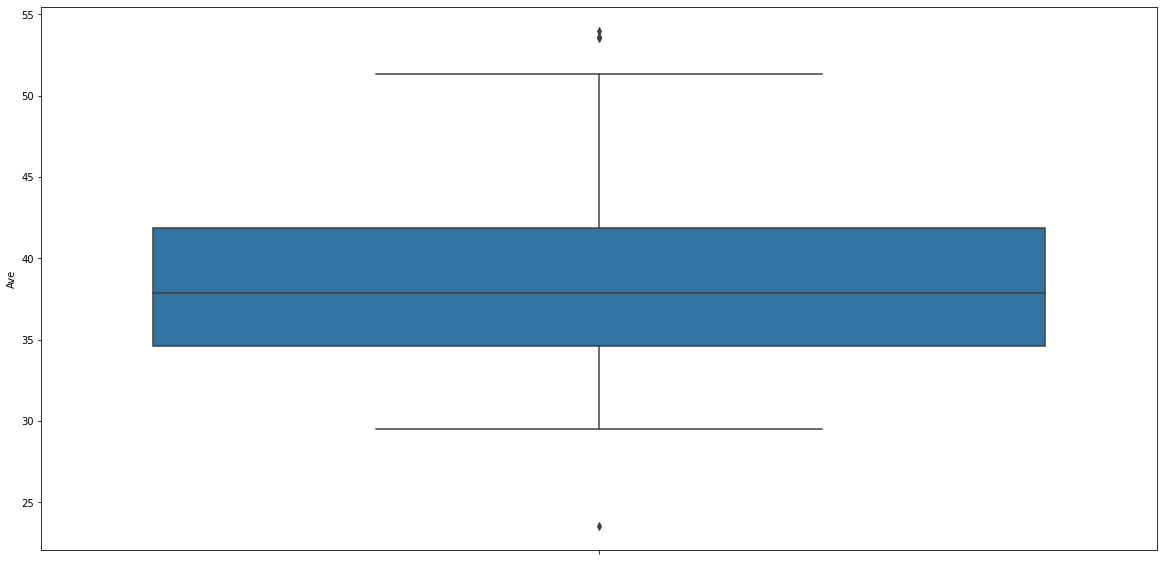

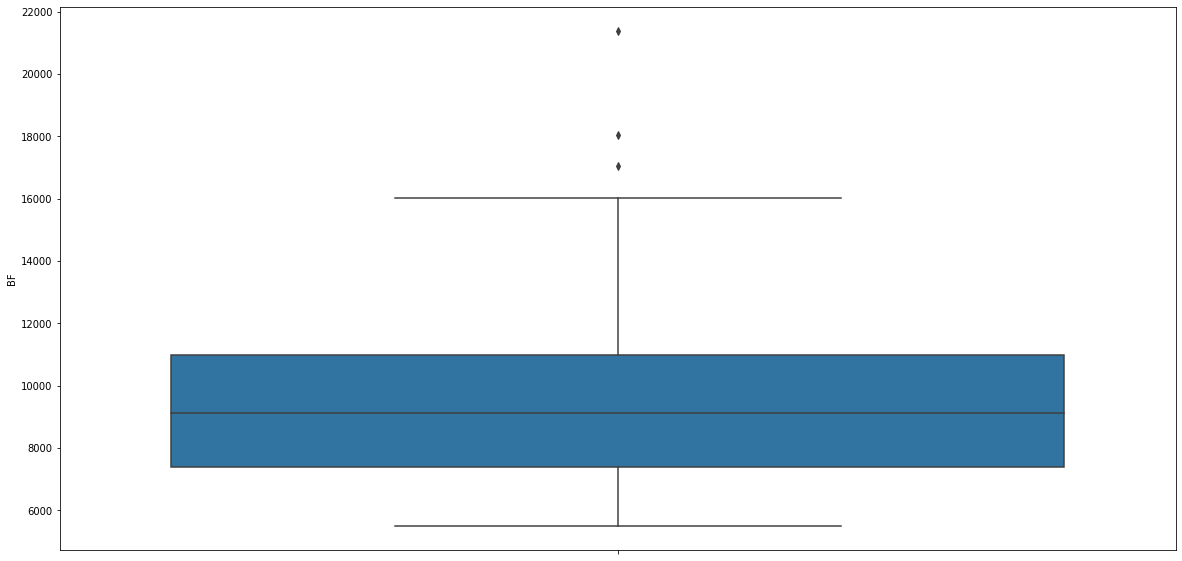

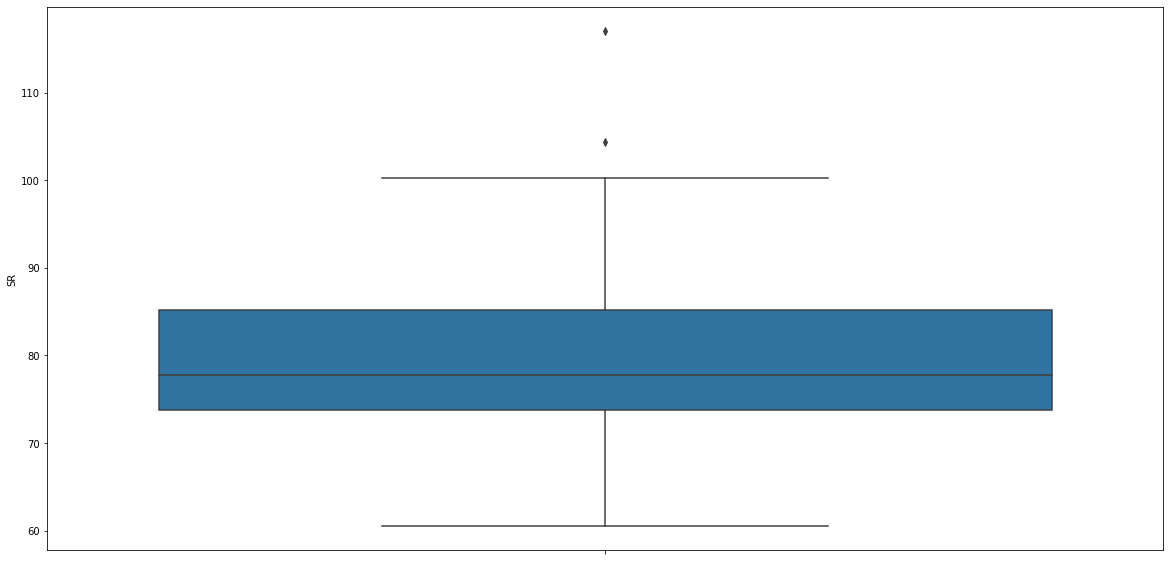

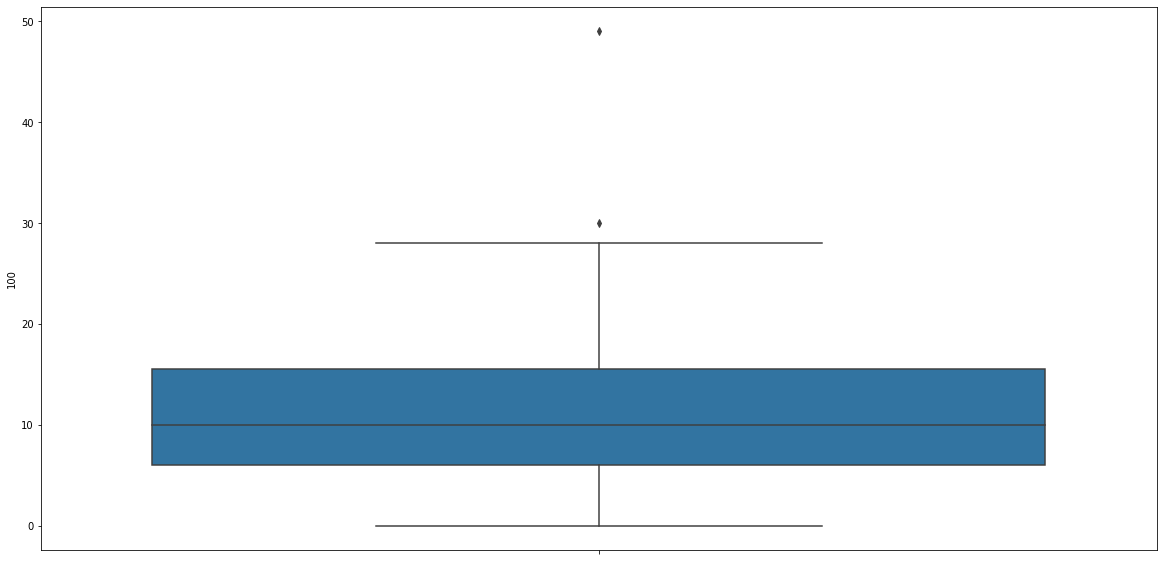

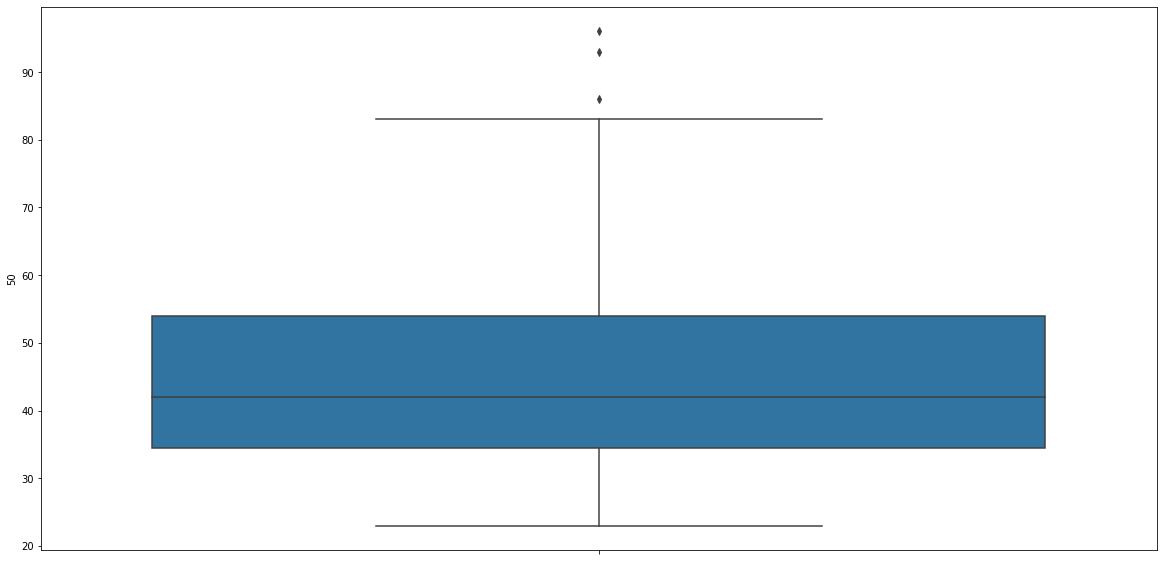

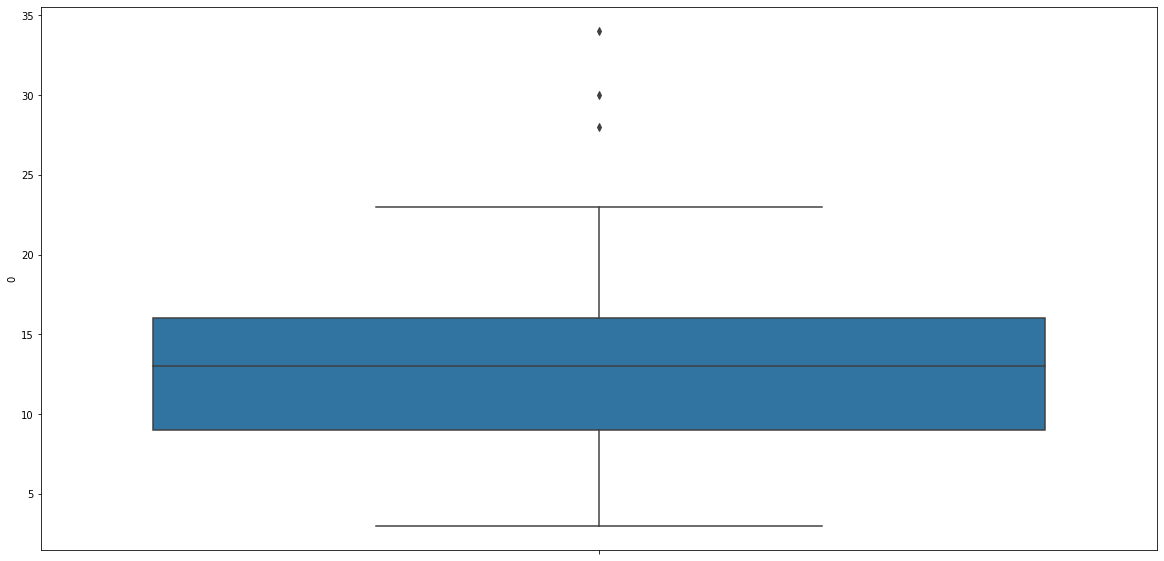

In [72]:
cols = ['Span','Mat','Inns','NO','Runs','HS','Ave','BF','SR','100','50','0']
for col in cols:
  plt.figure(figsize=(20,10))
  sns.boxplot(y=col,data=df)
  plt.ylabel(col)
  plt.show()

In [73]:
cols = ['Span','Mat','Inns','NO','Runs','HS','Ave','BF','SR','100','50','0']
for col in cols:
  Q3 = df[col].quantile(0.99)
  Q1 = df[col].quantile(0.01)
  df[col][df[col]<=Q1]=Q1
  df[col][df[col]>=Q3]=Q3

<ipython-input-73-6a6409ebe45e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col]<=Q1]=Q1
<ipython-input-73-6a6409ebe45e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col]>=Q3]=Q3


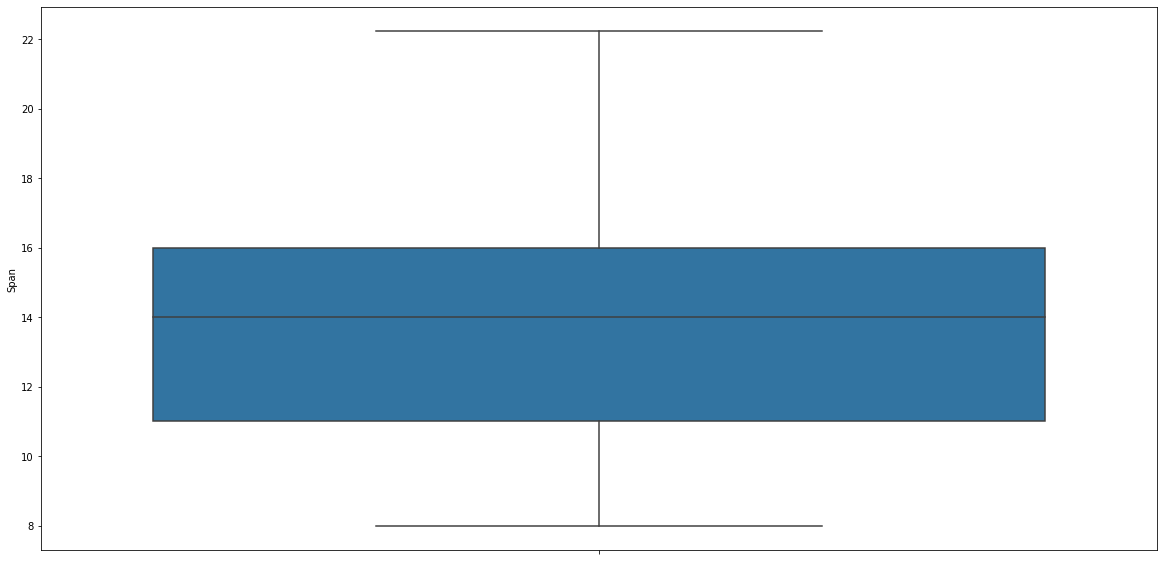

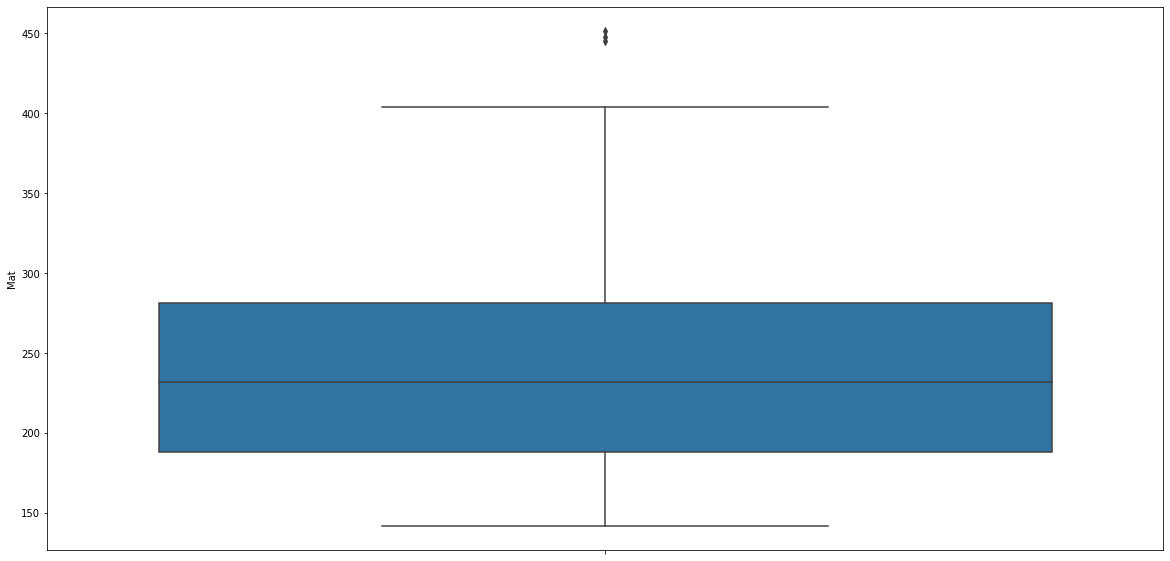

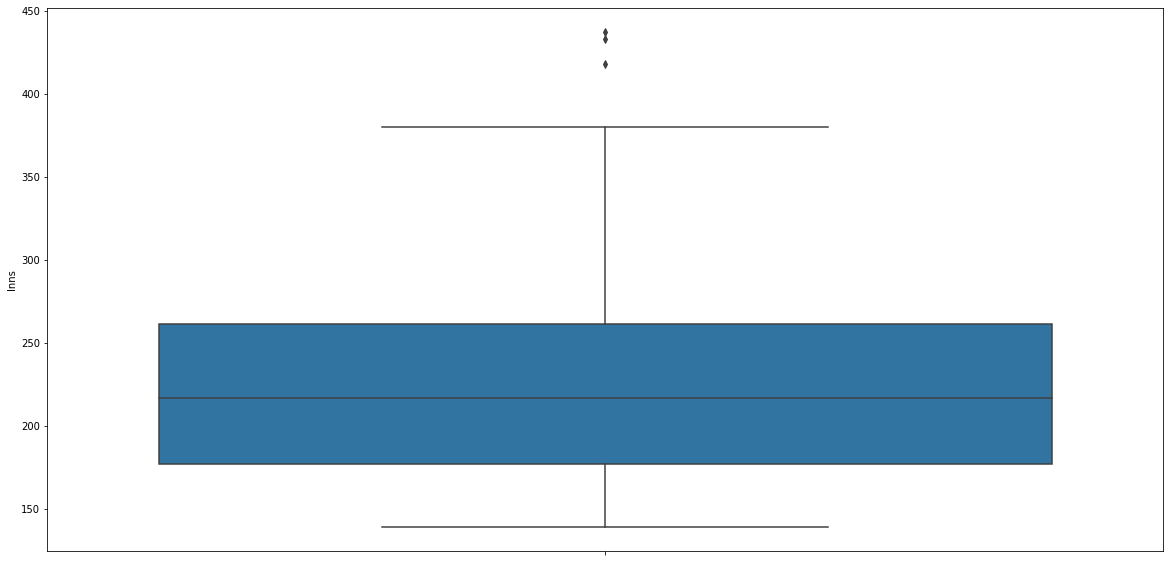

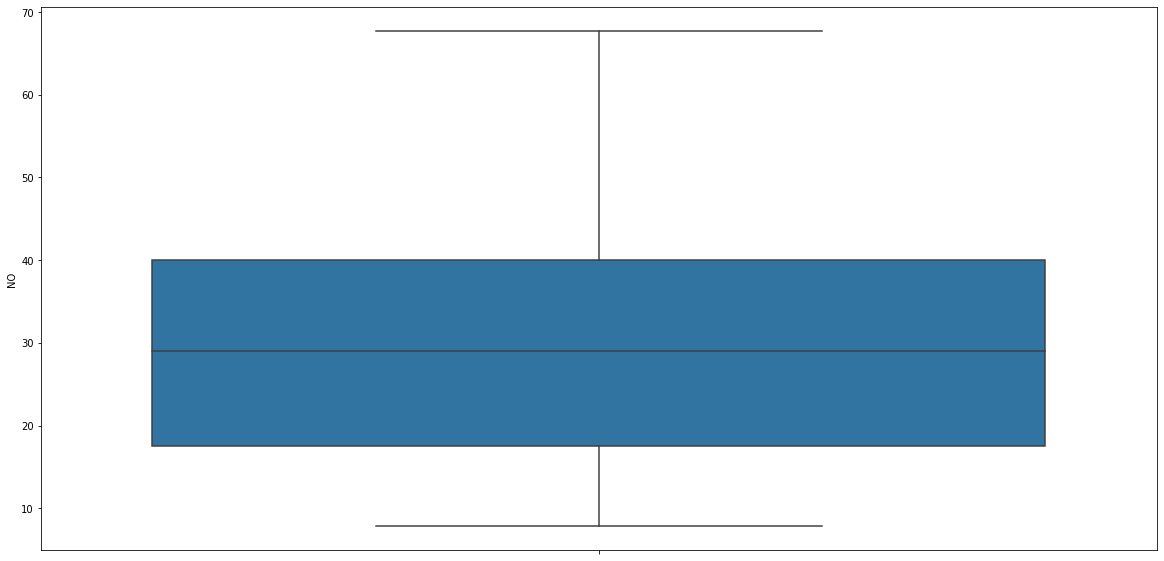

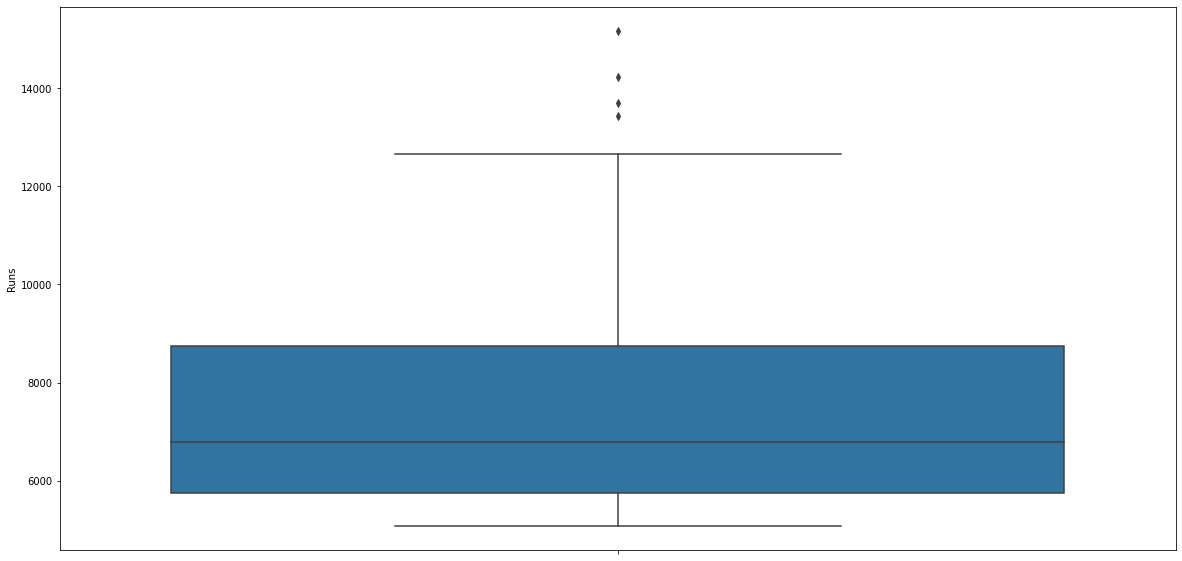

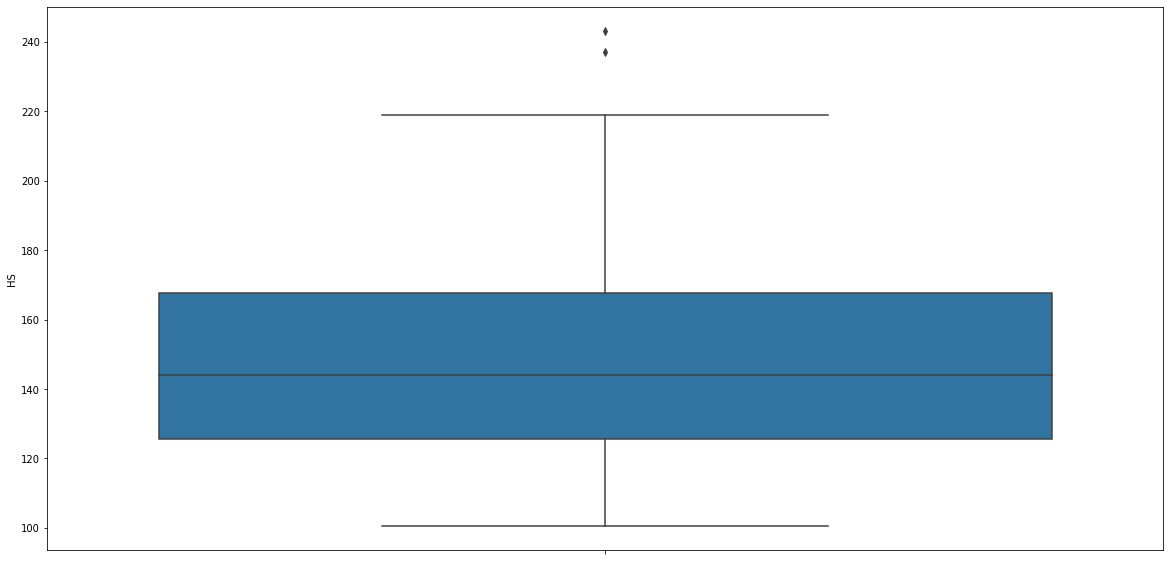

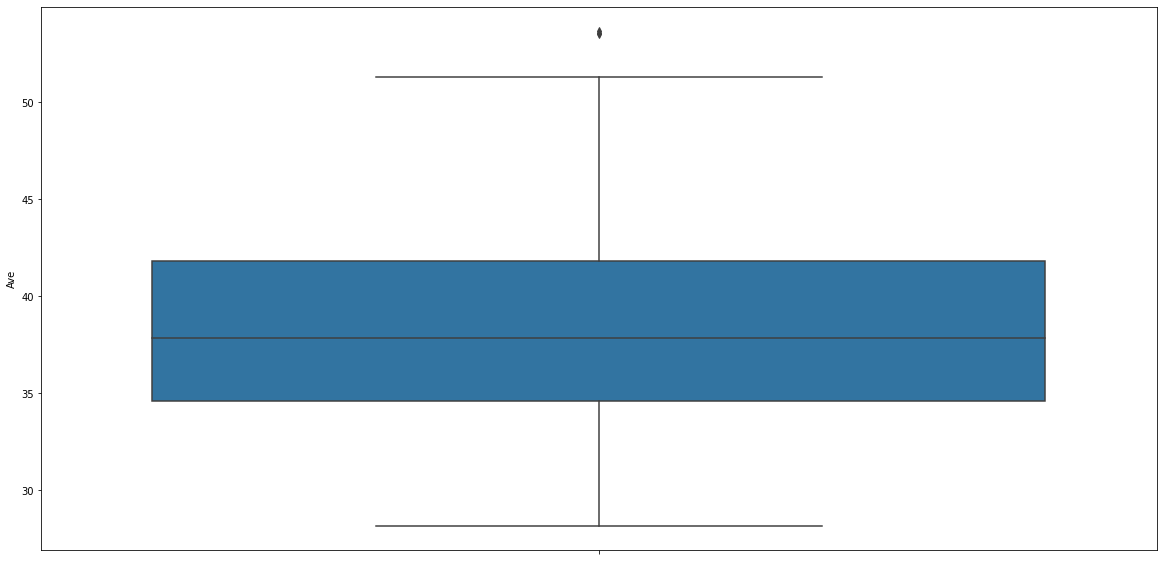

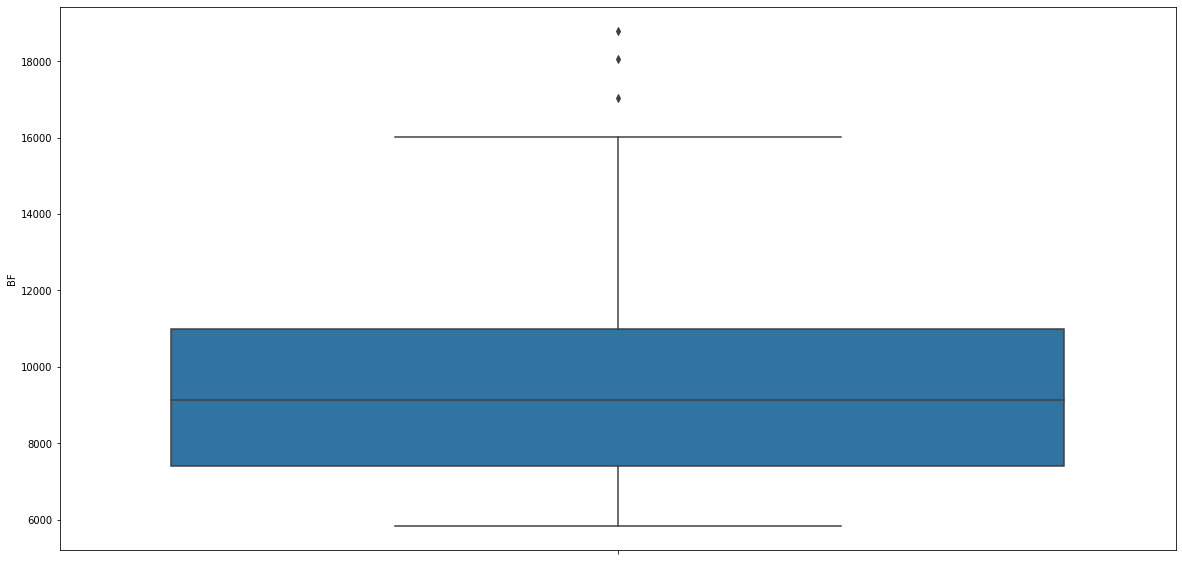

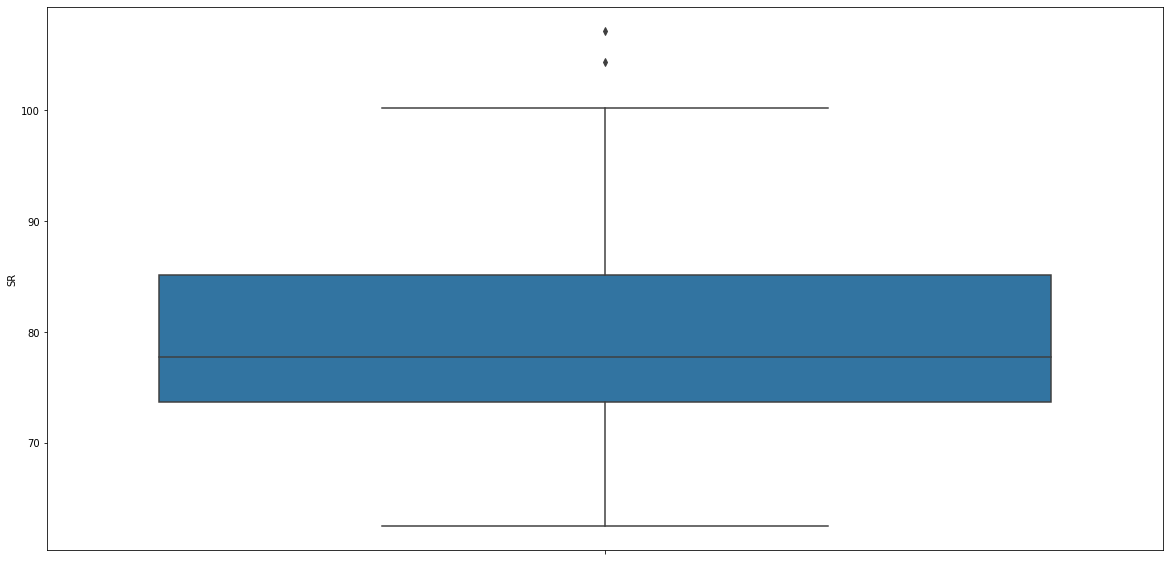

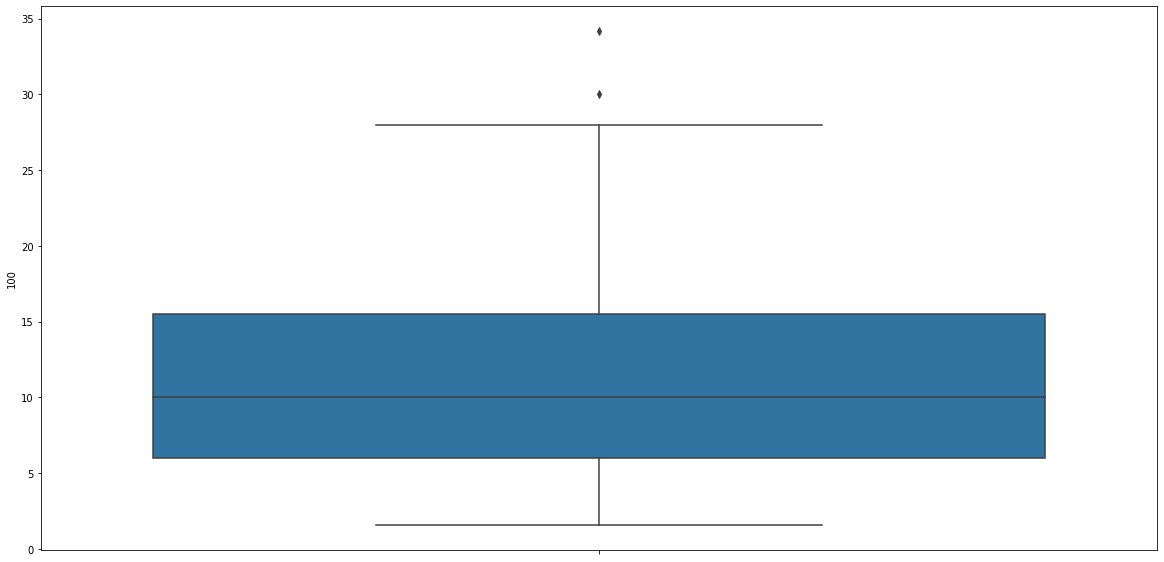

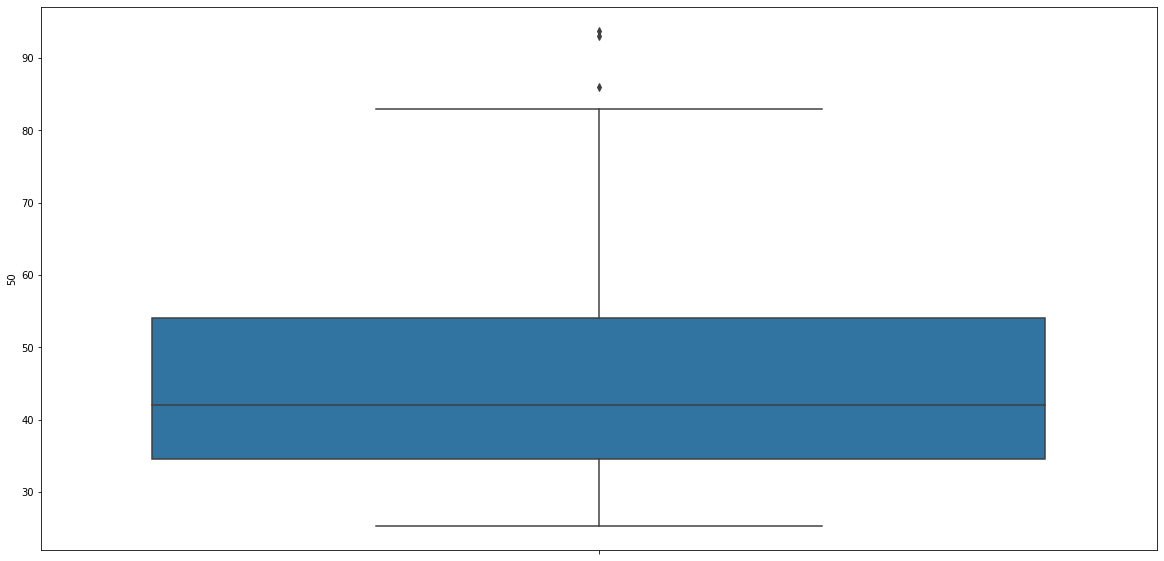

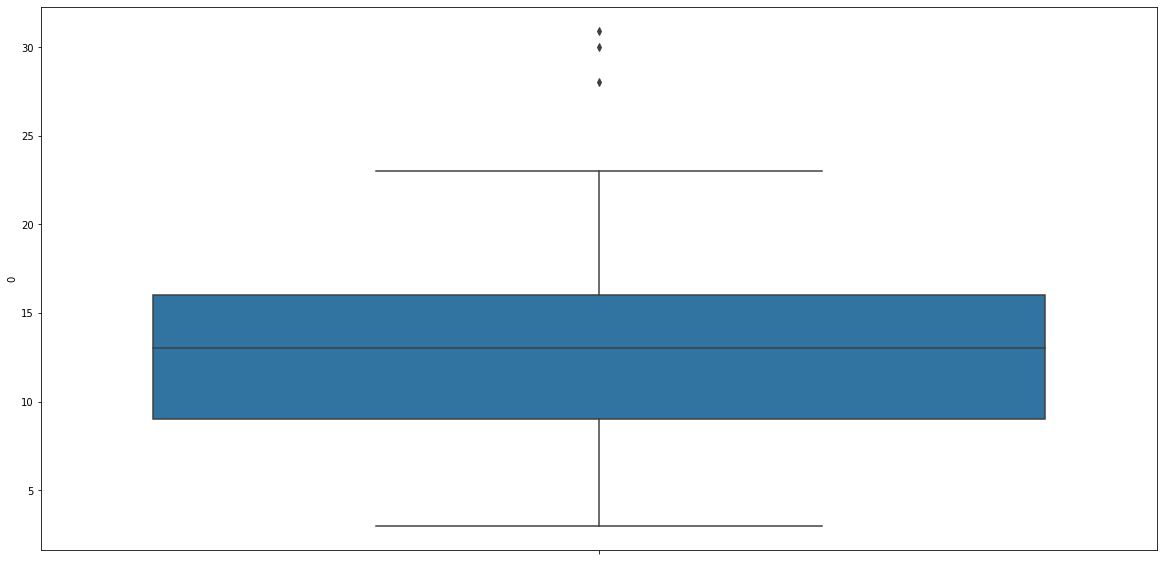

In [74]:
cols = ['Span','Mat','Inns','NO','Runs','HS','Ave','BF','SR','100','50','0']
for col in cols:
  plt.figure(figsize=(20,10))
  sns.boxplot(y=col,data=df)
  plt.ylabel(col)
  plt.show()

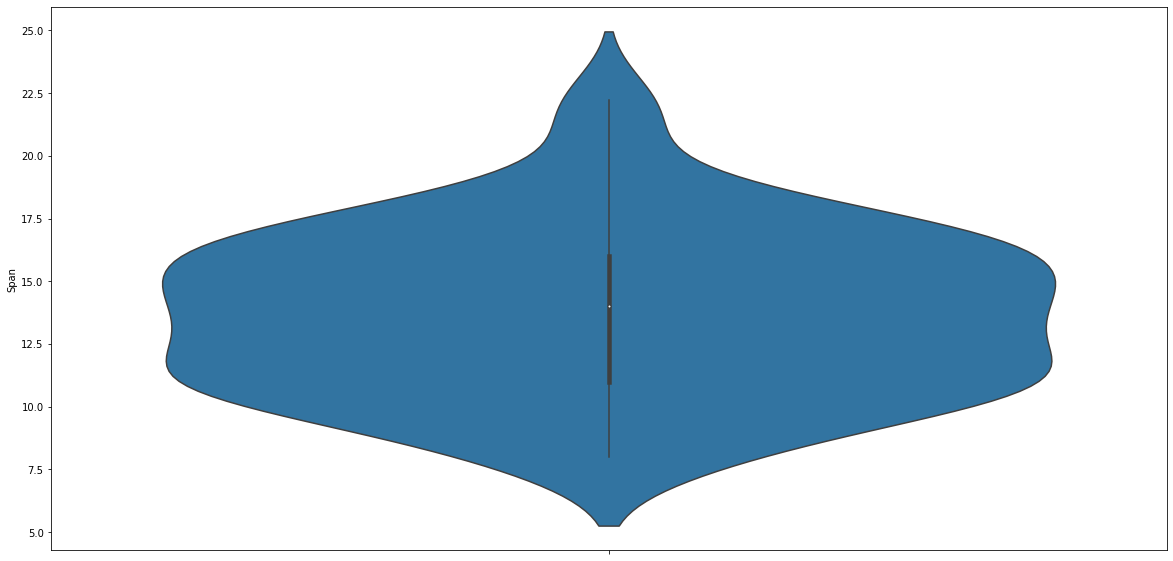

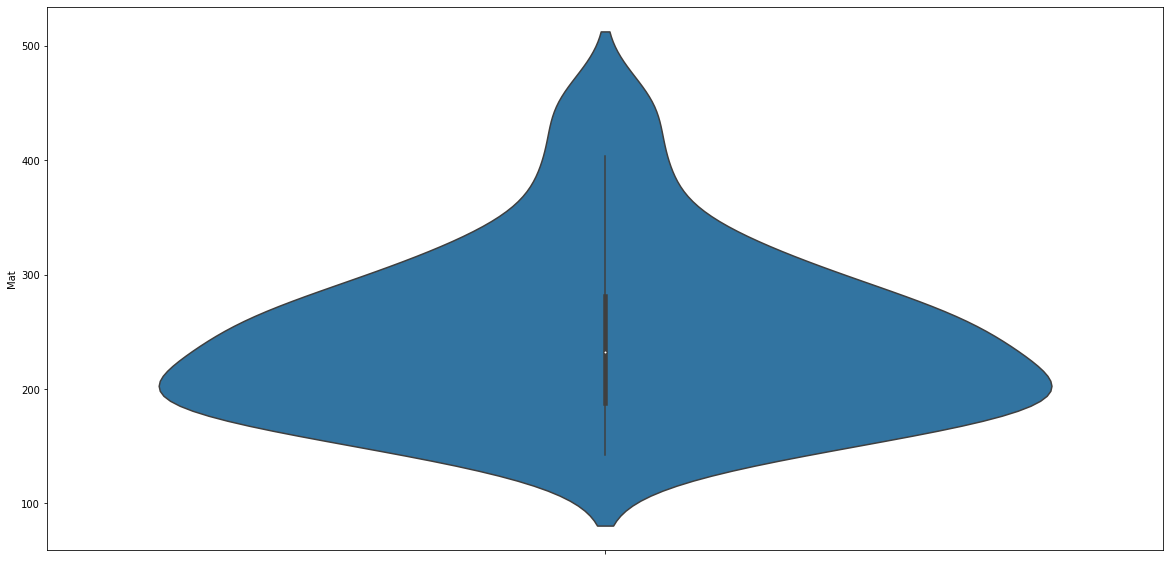

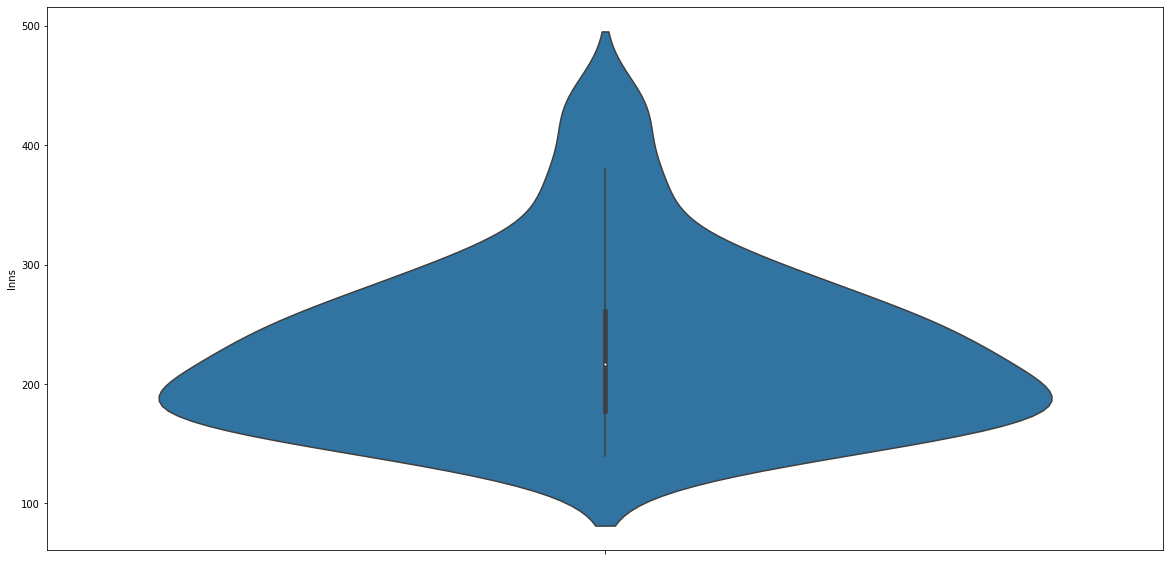

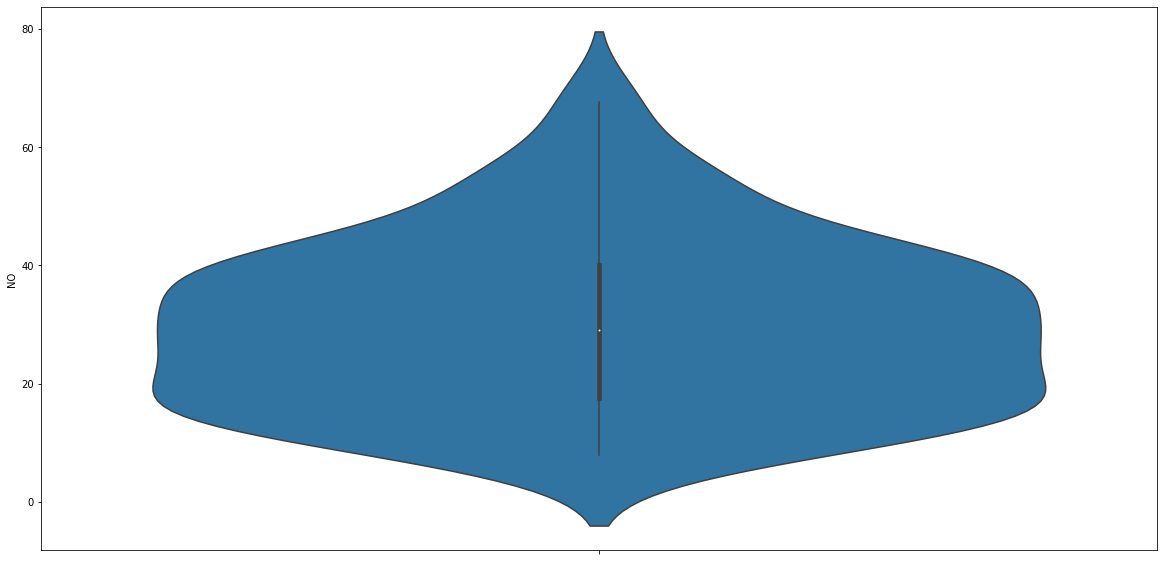

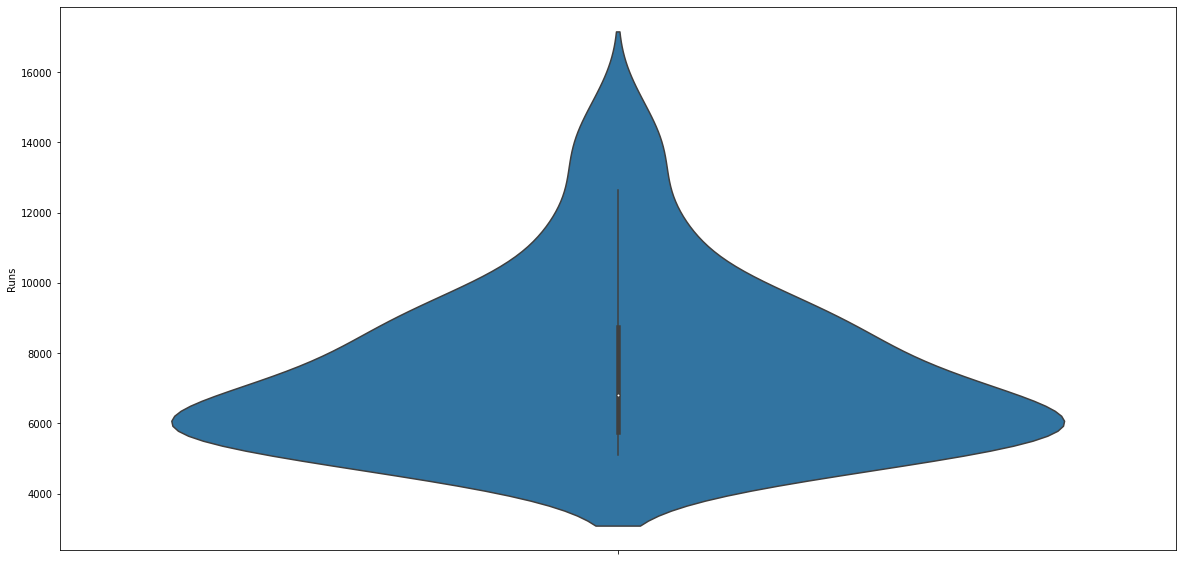

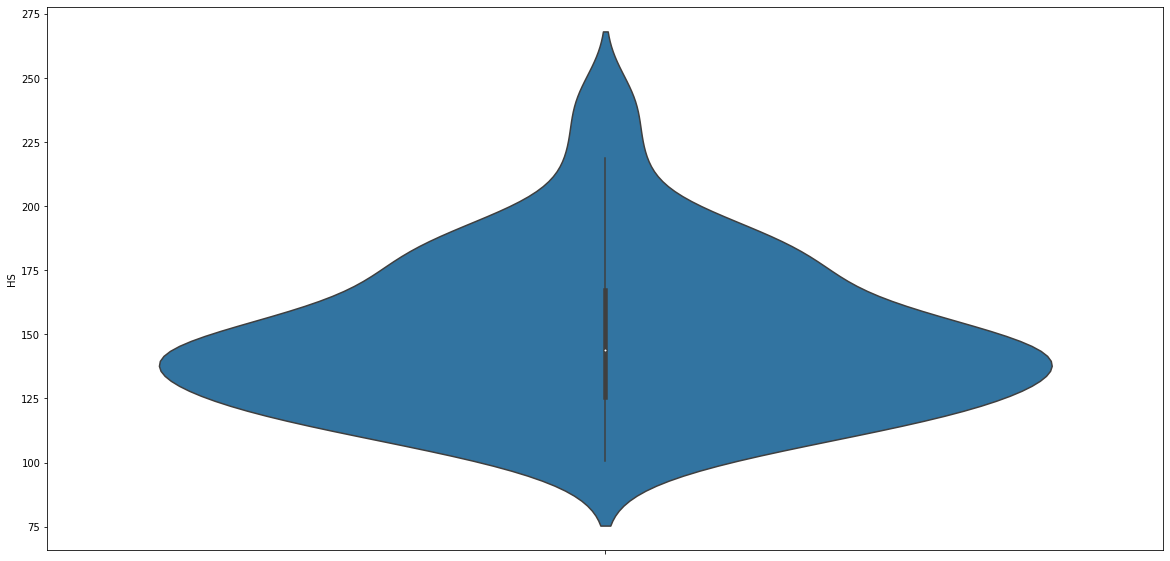

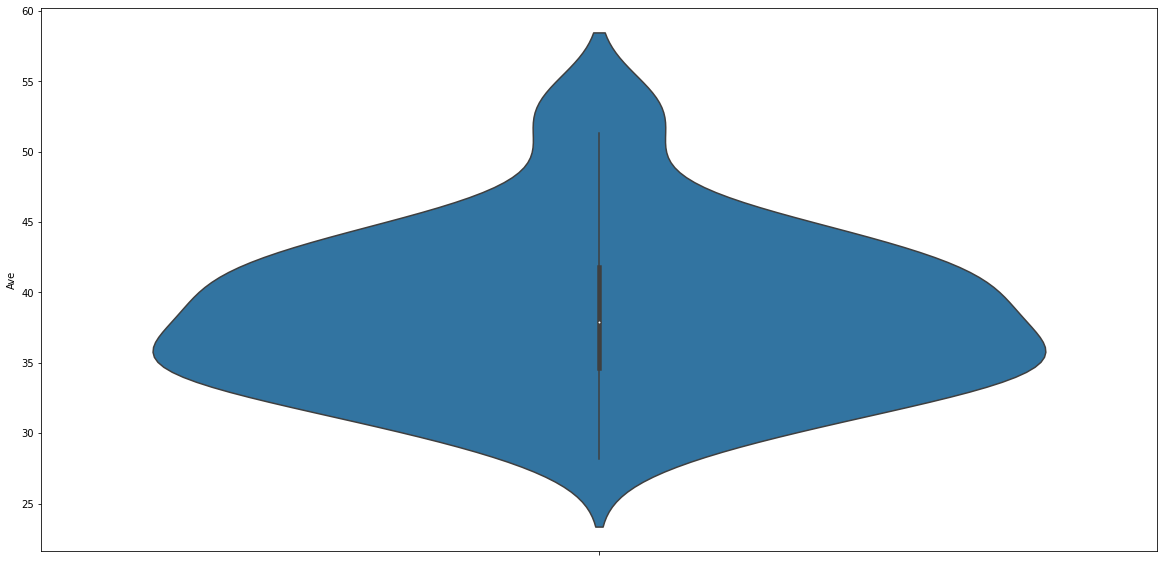

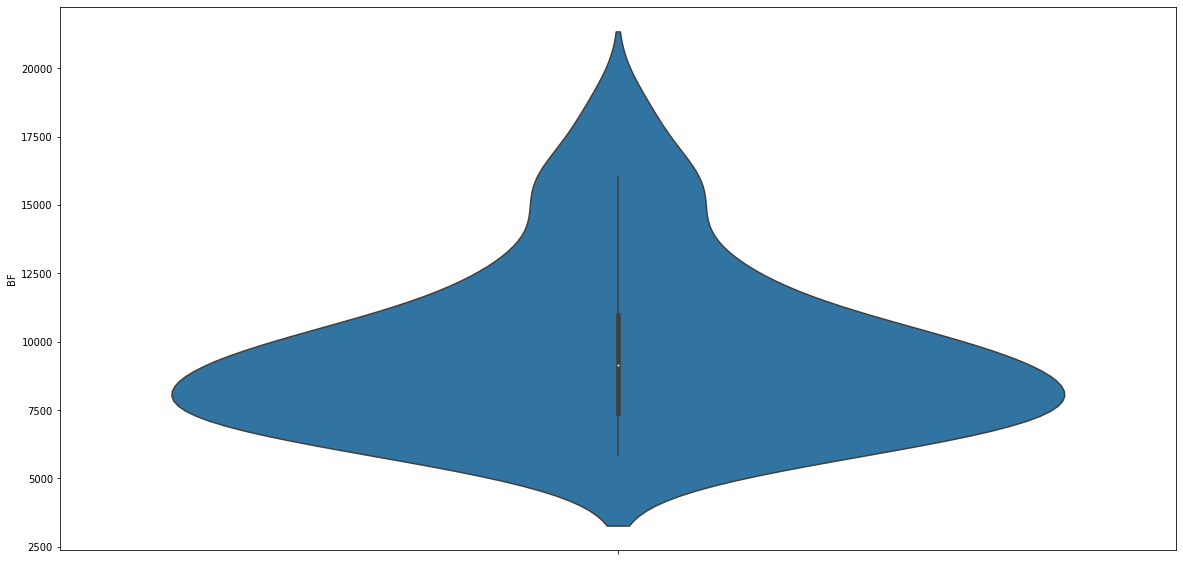

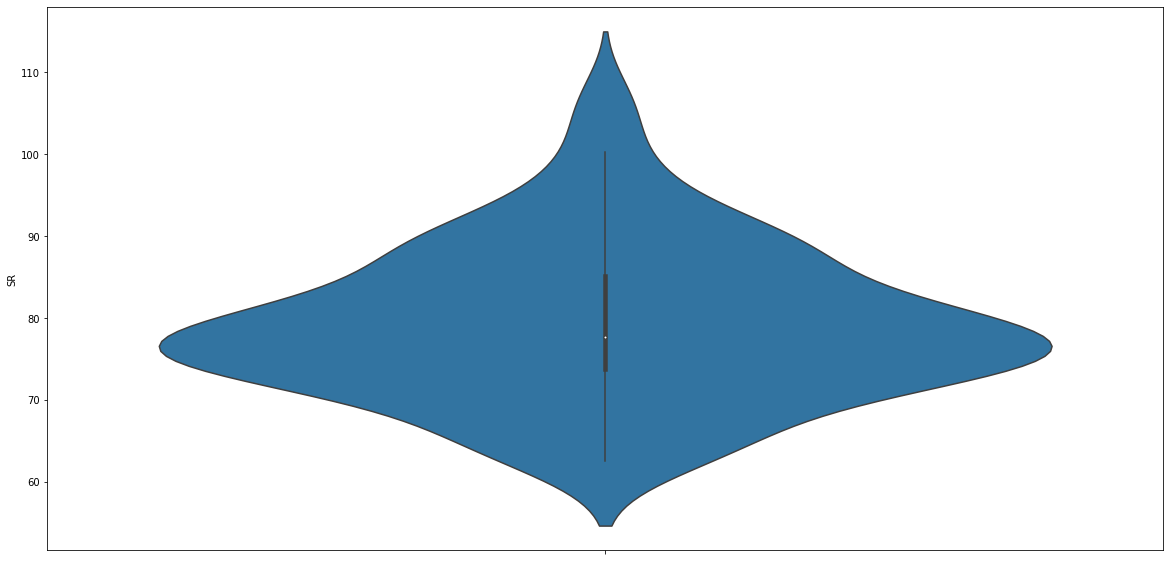

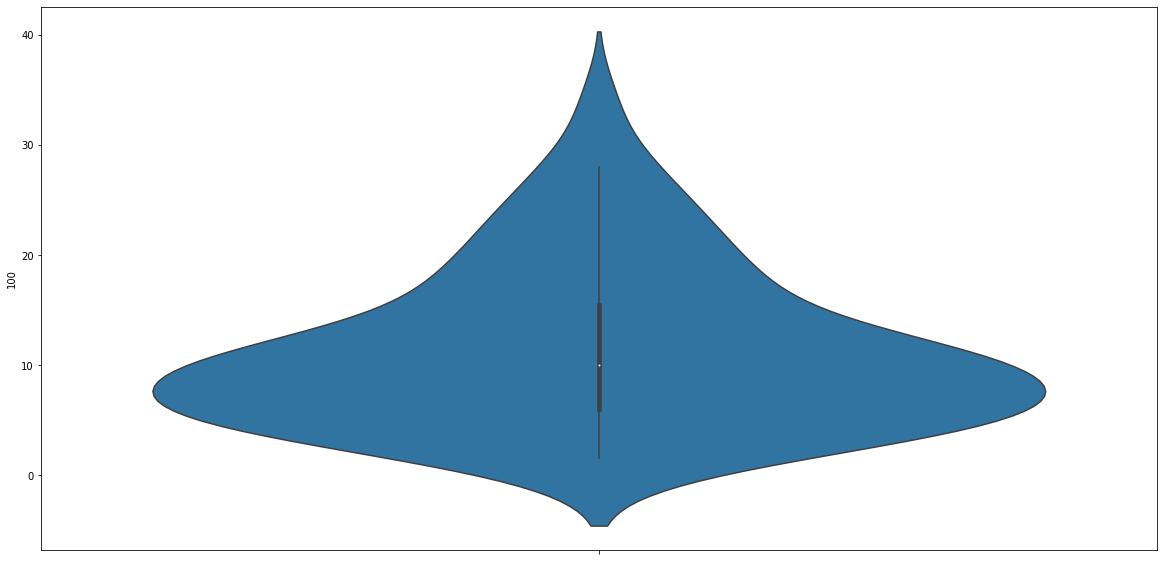

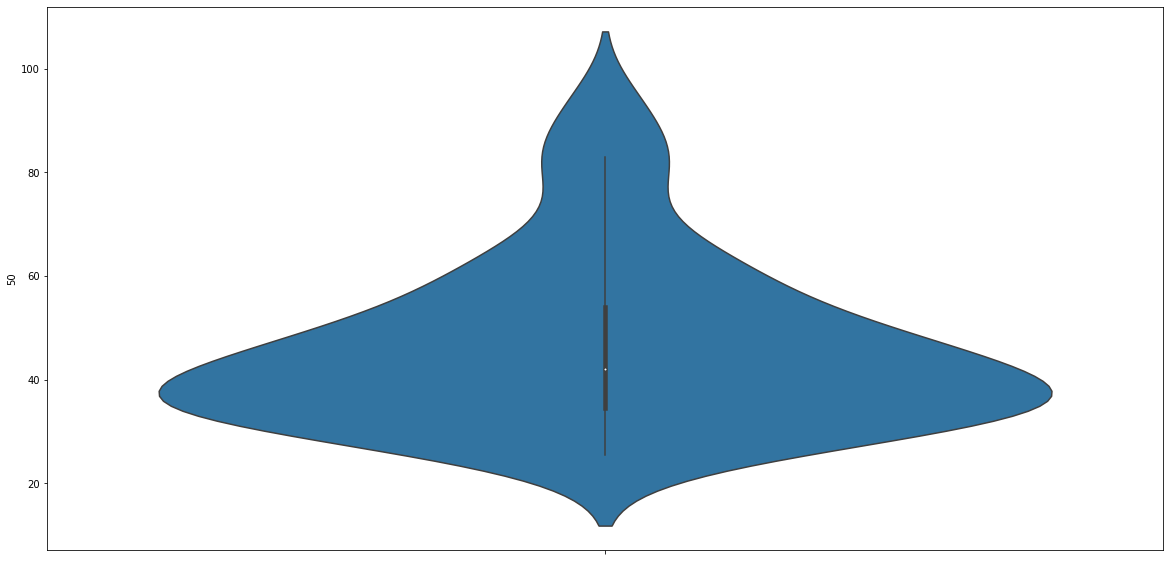

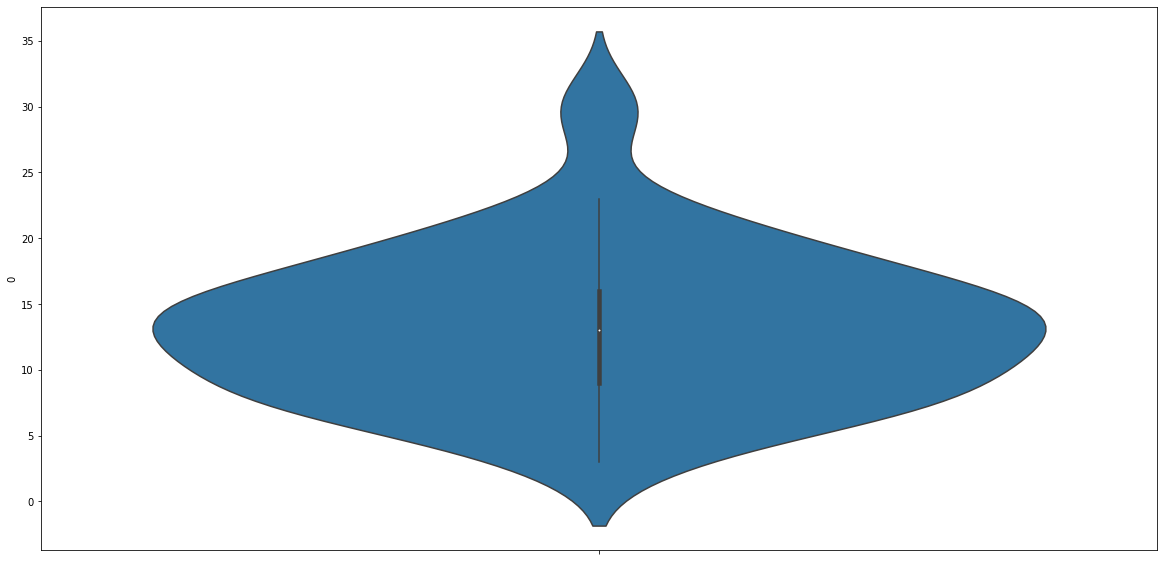

In [75]:
cols = ['Span','Mat','Inns','NO','Runs','HS','Ave','BF','SR','100','50','0']
for col in cols:
  plt.figure(figsize=(20,10))
  sns.violinplot(y=col,data=df)
  plt.ylabel(col)
  plt.show()

In [77]:
df_dropped = df.drop(columns=['Player'])
df_dropped

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,22.22,451.30,437.18,41.0,15156.24,200.00,44.83,18778.18,86.23,34.18,93.66,20.00
1,15.00,404.00,380.00,41.0,14234.00,169.00,41.98,18048.00,78.86,25.00,93.00,15.00
2,17.00,375.00,365.00,39.0,13704.00,164.00,42.03,17046.00,80.39,30.00,82.00,20.00
3,22.00,445.00,433.00,18.0,13430.00,189.00,32.36,14725.00,91.20,28.00,68.00,30.88
4,17.00,448.00,418.00,39.0,12650.00,144.00,33.37,16020.00,78.96,19.00,77.00,28.00
...,...,...,...,...,...,...,...,...,...,...,...,...
74,16.00,142.04,139.48,13.0,5134.00,133.00,45.03,7908.00,64.92,11.00,31.00,3.00
75,13.00,162.00,149.00,31.0,5122.00,100.68,43.40,6945.00,73.75,1.56,42.00,6.00
76,10.00,197.00,181.00,37.0,5092.00,120.00,35.36,6614.00,76.98,5.00,26.00,7.00
77,11.00,198.00,161.00,33.0,5088.00,156.00,39.75,5842.52,92.44,6.00,30.00,15.00


In [79]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_dropped),columns=df_dropped.columns)
df_scaled

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,2.599803,2.822800,2.991884,0.772431,3.183561,1.694030,1.088261,2.982414,0.749180,3.132640,2.929355,1.178619
1,0.387084,2.175263,2.164092,0.772431,2.796195,0.663400,0.592158,2.743689,-0.035687,1.870836,2.888409,0.310242
2,1.000026,1.778253,1.946938,0.631248,2.573580,0.497169,0.600862,2.416095,0.127250,2.558093,2.205965,1.178619
3,2.532380,2.736553,2.931370,-0.851172,2.458493,1.328323,-1.082408,1.657268,1.278458,2.283190,1.337401,3.068208
4,1.000026,2.777623,2.714216,0.631248,2.130871,-0.167754,-0.906596,2.080655,-0.025037,1.046127,1.895764,2.568023
...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.693555,-1.410967,-1.317905,-1.204129,-1.026055,-0.533462,1.123075,-0.571481,-1.520223,-0.053484,-0.958091,-1.773864
75,-0.225857,-1.137714,-1.180084,0.066517,-1.031096,-1.607977,0.839339,-0.886324,-0.579875,-1.351026,-0.275647,-1.252838
76,-1.145270,-0.658565,-0.716822,0.490065,-1.043696,-0.965662,-0.560194,-0.994541,-0.235897,-0.878193,-1.268293,-1.079162
77,-0.838799,-0.644875,-1.006361,0.207700,-1.045377,0.231200,0.203979,-1.246769,1.410512,-0.740742,-1.020131,0.310242


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

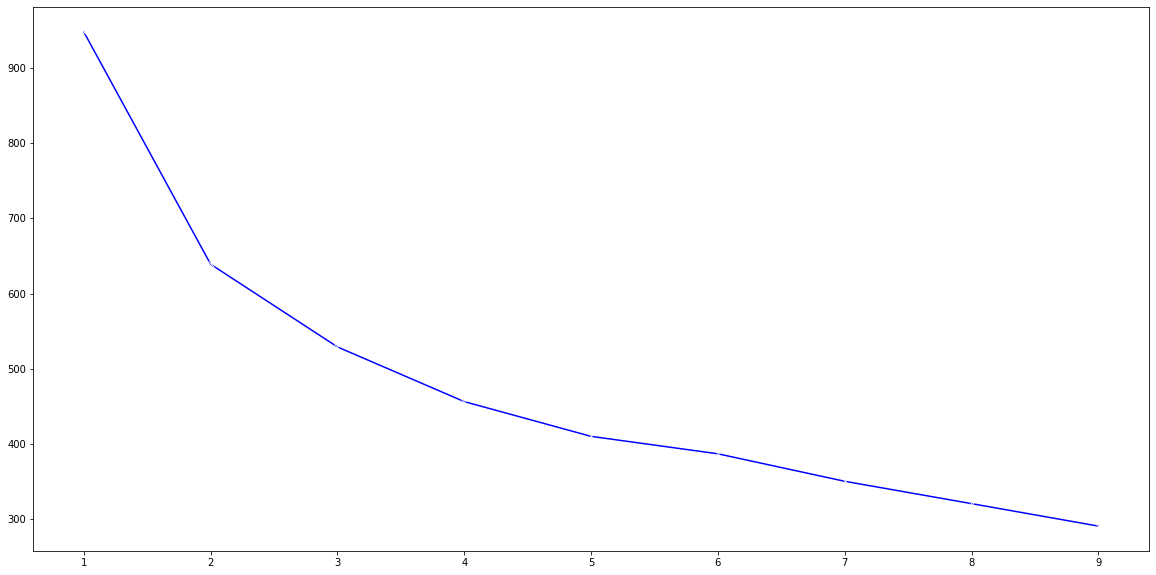

In [80]:
sse = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i,random_state=1).fit(df_scaled)
  sse.append(kmeans.inertia_)
plt.figure(figsize=(20,10))
sns.lineplot(x=list(range(1,10)),y=sse,marker='x',color='blue')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

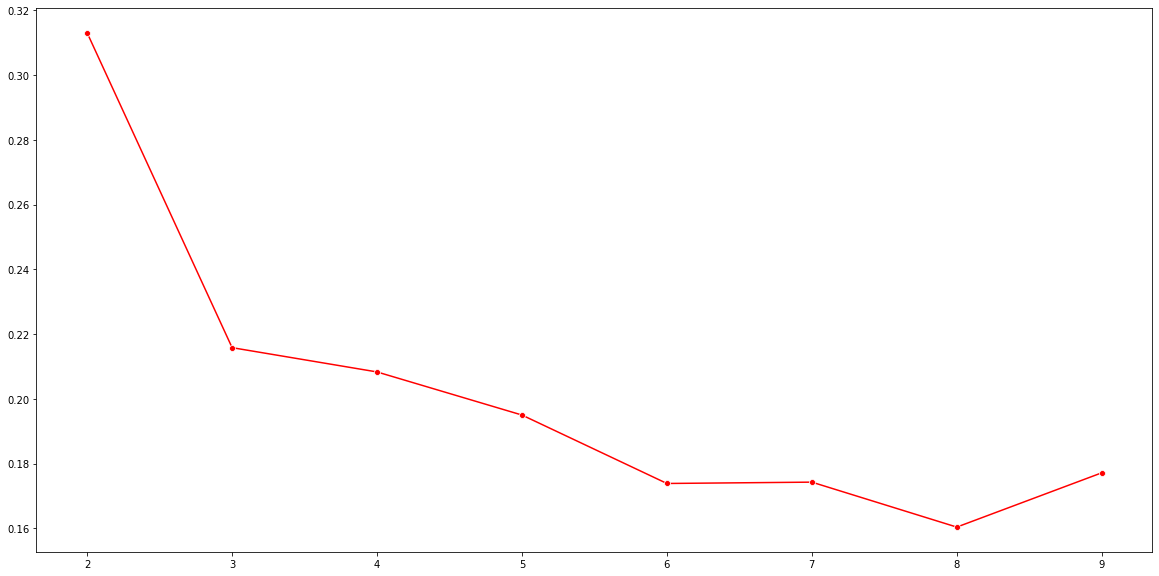

In [84]:
sil = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i,random_state=1).fit(df_scaled)
  labels = kmeans.predict(df_scaled)
  sil.append(silhouette_score(df_scaled,labels))
plt.figure(figsize=(20,10))
sns.lineplot(x=list(range(2,10)),y=sil,marker='o',color='red')
plt.show()

In [85]:
kmeans = KMeans(n_clusters=2,random_state=1).fit(df_scaled)
labels = kmeans.predict(df_scaled)
df['KMeans_Labels'] = labels
df

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,KMeans_Labels
0,SR Tendulkar (INDIA),22.22,451.30,437.18,41.0,15156.24,200.00,44.83,18778.18,86.23,34.18,93.66,20.00,0
1,KC Sangakkara (Asia/ICC/SL),15.00,404.00,380.00,41.0,14234.00,169.00,41.98,18048.00,78.86,25.00,93.00,15.00,0
2,RT Ponting (AUS/ICC),17.00,375.00,365.00,39.0,13704.00,164.00,42.03,17046.00,80.39,30.00,82.00,20.00,0
3,ST Jayasuriya (Asia/SL),22.00,445.00,433.00,18.0,13430.00,189.00,32.36,14725.00,91.20,28.00,68.00,30.88,0
4,DPMD Jayawardene (Asia/SL),17.00,448.00,418.00,39.0,12650.00,144.00,33.37,16020.00,78.96,19.00,77.00,28.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),16.00,142.04,139.48,13.0,5134.00,133.00,45.03,7908.00,64.92,11.00,31.00,3.00,1
75,Misbah-ul-Haq (PAK),13.00,162.00,149.00,31.0,5122.00,100.68,43.40,6945.00,73.75,1.56,42.00,6.00,1
76,PD Collingwood (ENG),10.00,197.00,181.00,37.0,5092.00,120.00,35.36,6614.00,76.98,5.00,26.00,7.00,1
77,A Symonds (AUS),11.00,198.00,161.00,33.0,5088.00,156.00,39.75,5842.52,92.44,6.00,30.00,15.00,1


In [87]:
df[df['KMeans_Labels']==0].sort_values(by=['Mat','Inns','Ave','SR','Runs'],ascending=[False,False,False,False,False]).head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,KMeans_Labels
0,SR Tendulkar (INDIA),22.22,451.3,437.18,41.0,15156.24,200.0,44.8300,18778.18,86.2300,34.18,93.66,20.00,0
4,DPMD Jayawardene (Asia/SL),17.00,448.0,418.00,39.0,12650.00,144.0,33.3700,16020.00,78.9600,19.00,77.00,28.00,0
3,ST Jayasuriya (Asia/SL),22.00,445.0,433.00,18.0,13430.00,189.0,32.3600,14725.00,91.2000,28.00,68.00,30.88,0
1,KC Sangakkara (Asia/ICC/SL),15.00,404.0,380.00,41.0,14234.00,169.0,41.9800,18048.00,78.8600,25.00,93.00,15.00,0
27,Shahid Afridi (Asia/ICC/PAK),19.00,398.0,369.00,27.0,8064.00,124.0,28.1876,6892.00,107.1174,6.00,39.00,30.00,0


In [88]:
df[df['KMeans_Labels']==1].sort_values(by=['Mat','Inns','Ave','SR','Runs'],ascending=[False,False,False,False,False]).head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,KMeans_Labels
30,SR Waugh (AUS),16.0,325.0,288.0,58.0,7569.0,120.0,32.90,9971.0,75.91,3.0,45.0,15.0,1
35,Saleem Malik (PAK),17.0,283.0,256.0,38.0,7170.0,102.0,32.88,9383.0,76.41,5.0,47.0,19.0,1
28,SP Fleming (ICC/NZ),13.0,280.0,269.0,21.0,8037.0,134.0,32.40,11242.0,71.49,8.0,49.0,17.0,1
45,AR Border (AUS),15.0,273.0,252.0,39.0,6524.0,127.0,30.62,9134.0,71.42,3.0,39.0,11.0,1
31,A Ranatunga (SL),17.0,269.0,255.0,47.0,7456.0,131.0,35.84,9571.0,77.90,4.0,49.0,18.0,1


In [98]:
mean = df.groupby('KMeans_Labels').mean()
df_compare = pd.DataFrame(mean)
df_compare.index = ['g0 mean','g1 mean']
df_compare

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
g0 mean,16.555455,335.013636,317.099091,36.666364,10676.238182,160.227273,39.169436,13457.917273,80.489882,17.190000,66.620909,17.176364
g1 mean,12.649123,210.404211,197.096140,27.507018,6380.565614,144.730175,38.349986,8188.552982,78.695361,9.150175,38.655088,11.684211


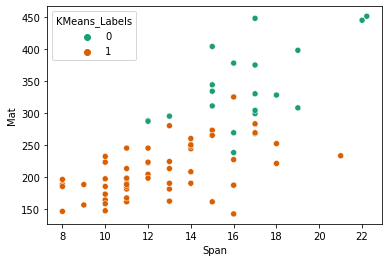

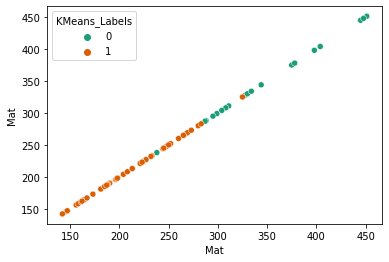

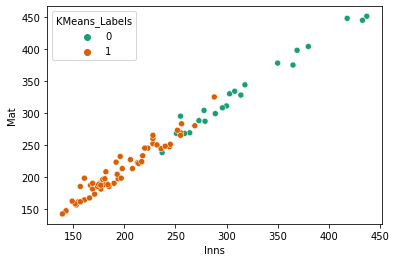

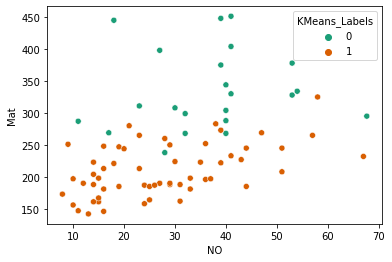

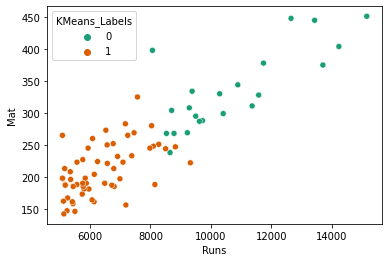

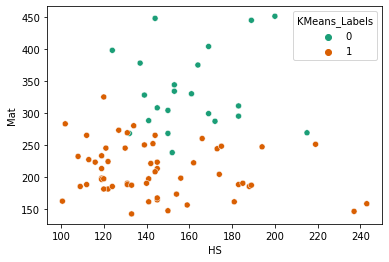

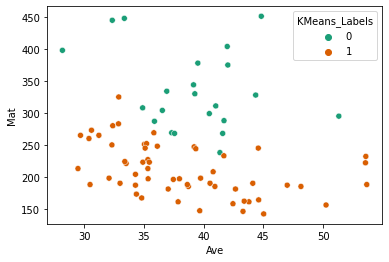

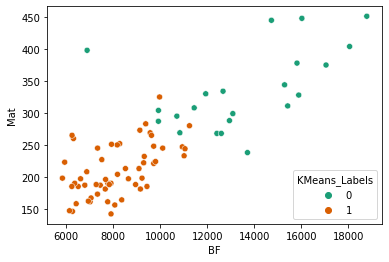

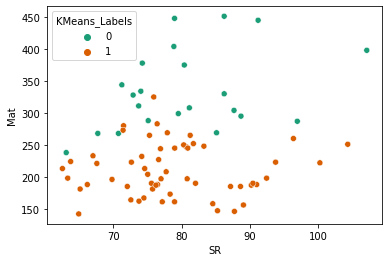

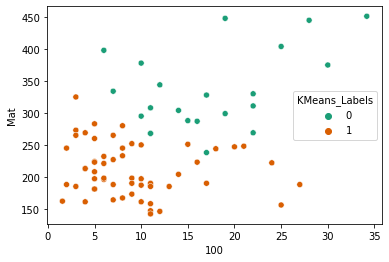

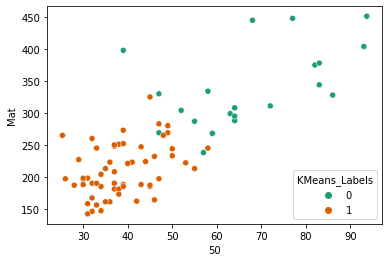

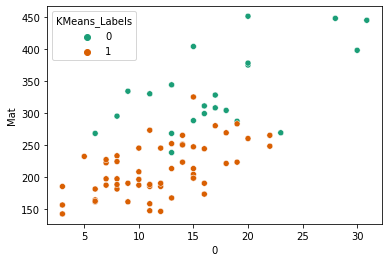

In [100]:
cols = list(df_dropped.columns)
for col in cols:
  sns.scatterplot(data = df, x=col, y='Mat', hue='KMeans_Labels', palette='Dark2')
  plt.xlabel(col)
  plt.show()

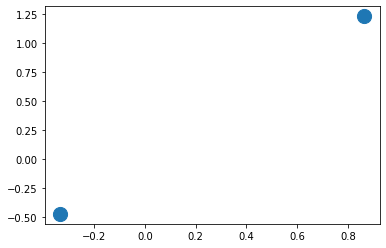

In [105]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200)
plt.show()